# Dependencies

In [93]:
pacman::p_load(
    igraph, graphlayouts, ggraph, ggforce, dplyr, ggplot2, GUniFrac, ggsignif,
    dendextend, ComplexHeatmap, ANCOMBC, TreeSummarizedExperiment, lsmeans
)

# Functions

In [344]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/Misc_functions.R")

In [3]:
set.seed(111)
baseplot.fx <- function(mydf, x, y, fill, clr, colpal) {
    p1 <- ggplot(mydf, aes(x = factor(eval(parse(text = x))), y = eval(parse(text = y)), color = eval(parse(text = clr)), fill = eval(parse(text = fill)))) +
        geom_jitter(width = 0.1, height = 0.1, alpha = 0.2) +
        geom_boxplot(outlier.shape = NA, alpha = 0.1) +
        # geom_smooth(method = "loess", se = TRUE, aes(group = 1), color = "black", fill = "grey") +
        myplot +
        myaxis +
        scale_color_manual(values = colpal) +
        scale_fill_manual(values = colpal) +
        theme(legend.position = "none") +
        labs(x = x, y = gsub("`", "", y))
    return(p1)
}


In [4]:
# zicoseq.fx <- function(pat_type_matrix, metadata, myvar) {
#     # pat_type_matrix is a matrix of GLIPH x samples
#     # metadata is a data frame with the metadata for each sample, rownames are the sample names, NA is converted to Unknown for all covariates

#     # Match colnames mylist[[1]] and discovery_metadata$sample_name
#     metadata_matched <- metadata[colnames(pat_type_matrix), ]

#     ZicoSeq.obj <- ZicoSeq(
#         meta.dat = metadata_matched, feature.dat = pat_type_matrix,
#         grp.name = myvar, adj.name = c("Sex", "study", "Agegroup"), feature.dat.type = "count",
#         prev.filter = 0, mean.abund.filter = 0,
#         max.abund.filter = 0, min.prop = 0,
#         # Winsorization to replace outliers
#         is.winsor = FALSE, # outlier.pct = 0.03, winsor.end = 'top',
#         # Posterior sampling
#         is.post.sample = TRUE, post.sample.no = 25,
#         # Use the square-root transformation
#         link.func = list(function(x) x^0.5), stats.combine.func = max,
#         # Permutation-based multiple testing correction
#         perm.no = 99, strata = NULL,
#         # Reference-based multiple stage normalization
#         ref.pct = 0.5, stage.no = 6, excl.pct = 0.2,
#         # Family-wise error rate control
#         is.fwer = TRUE, verbose = TRUE, return.feature.dat = TRUE
#     )

#     r2_fdr <- as.data.frame(ZicoSeq.obj$R2)
#     r2_fdr$padj <- ZicoSeq.obj$p.adj.fdr[match(rownames(r2_fdr), names(ZicoSeq.obj$p.adj.fdr))]
#     return(r2_fdr)
# }


# Paths

In [5]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [6]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/analysis/GLIPH/run_gliph/"

# Main

# Create summary tables

In [7]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

In [8]:
#remove those samples that we did not have the TCRseq data for
meta_div <- meta_div[!is.na(meta_div$TRB),]

In [9]:
gliph_out <- readr::read_csv(paste0(h4hpath, "/v5/gliph_output/int_vdj_v5_cluster.csv"), col_names = T) #  gliph reference dataset  is MItechel

Rows: 98847 Columns: 29
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (17): pattern, type, TcRb, V, J, Sample, HLA-A, HLA-B, HLA-C, HLA-DPA1, ...
dbl (11): index, Fisher_score, number_subject, number_unique_cdr3, final_sco...
lgl  (1): TcRa

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [10]:
# remove columns starting with HLA
gliph_out <- gliph_out[,!grepl("HLA", colnames(gliph_out))]

In [11]:
head(gliph_out)

index,pattern,Fisher_score,number_subject,number_unique_cdr3,final_score,hla_score,vb_score,expansion_score,length_score,cluster_size_score,type,TcRb,V,J,TcRa,Sample,Freq
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>
1,SLG%E,0,5,50,5e-12,1,0.001,0.35,0.001,1.4e-05,global-SLG%E,CASSLGTEQFF,TRBV27,TRBJ2-1,NA,Leukemia:CHP_405_X05-cfDNA,729
1,SLG%E,0,5,50,5e-12,1,0.001,0.35,0.001,1.4e-05,global-SLG%E,CASSLGAEAFF,TRBV6_7,NA,NA,MDavis:DRB10401,1
1,SLG%E,0,5,50,5e-12,1,0.001,0.35,0.001,1.4e-05,global-SLG%E,YASSLGGEQFF,TRBV6_7,NA,NA,MDavis:DRB10401,1
1,SLG%E,0,5,50,5e-12,1,0.001,0.35,0.001,1.4e-05,global-SLG%E,CASSLGVEQYF,TRBV27,TRBJ2-7,NA,Leukemia:CHP_359_X03-PBMC,24
1,SLG%E,0,5,50,5e-12,1,0.001,0.35,0.001,1.4e-05,global-SLG%E,CASSLGAEQYF,TRBV6_7,NA,NA,MDavis:DRB10401,1
1,SLG%E,0,5,50,5e-12,1,0.001,0.35,0.001,1.4e-05,global-SLG%E,CAWSLGDEQYF,TRBV6_7-or30_1,NA,NA,MDavis:C0304_DQA10303_DRB10401,1


In [12]:
#  tmp <- gliph_out[gliph_out$number_subject >= 3,]
#  tmp <- tmp[tmp$number_unique_cdr3 >= 3,]
# tmp <- tmp[tmp$Fisher_score < 0.001,]
# tmp <- tmp[tmp$expansion_score < 0.01,]
# tmp <- tmp[tmp$length_score < 0.002,]

# no single
tmp <- gliph_out[ gliph_out$pattern != "single",]

# only those with 3 or more unique cdr3
tmp <- tmp[tmp$number_unique_cdr3 >= 3,]

# only those patterns with CHP samples
importantgliphs <- tmp$pattern[ grepl("CHP", tmp$Sample)]
tmp <- tmp[ tmp$pattern %in% importantgliphs,]

In [13]:
dim(tmp)

[1] 48732    18

Create a gliph dataframe

In [14]:
gliphdf <- data.frame(gliph = unique(tmp$pattern))
rownames(gliphdf) <- gliphdf$gliph

In [15]:
head(gliphdf)

,gliph
,<chr>
SLG%E,SLG%E
S%GGNTE,S%GGNTE
GIWV,GIWV
IWV,IWV
WVYE,WVYE
IWVY,IWVY


In [16]:
tmp$subject <- gsub(":.*", "", tmp$Sample)

In [17]:
head(tmp[, c("subject", "Sample")])

subject,Sample
<chr>,<chr>
Leukemia,Leukemia:CHP_405_X05-cfDNA
MDavis,MDavis:DRB10401
MDavis,MDavis:DRB10401
Leukemia,Leukemia:CHP_359_X03-PBMC
MDavis,MDavis:DRB10401
MDavis,MDavis:C0304_DQA10303_DRB10401


In [18]:
names(table(tmp$subject[!grepl("CHP", tmp$Sample)]))

[1] "CEF"            "CMV"            "EBV"            "HCV"           
 [5] "HPV"            "HomoSapiens"    "Influenza"      "LFS"           
 [9] "M.tuberculosis" "MCPyV"          "MDavis"         "S-pneumoniae"

In [19]:
for(i in 1:nrow(gliphdf)){

mygliph <- tmp[tmp$pattern == gliphdf$gliph[i],]
# add gliphdf$CMV, if mygliph$subject ciontains CMV
gliphdf$CMV[i] <- ifelse(sum(grepl("CMV", mygliph$subject)) > 0, sum(grepl("CMV", mygliph$subject)), 0)
gliphdf$EBV[i] <- ifelse(sum(grepl("EBV", mygliph$subject)) > 0, sum(grepl("EBV", mygliph$subject)), 0)
gliphdf$HCV[i] <- ifelse(sum(grepl("HCV", mygliph$subject)) > 0, sum(grepl("HCV", mygliph$subject)), 0)
gliphdf$Influenza[i] <- ifelse(sum(grepl("Influenza", mygliph$subject)) > 0, sum(grepl("Influenza", mygliph$subject)), 0)

gliphdf$HomoSapiens[i] <- ifelse(sum(grepl("HomoSapiens", mygliph$subject)) > 0, sum(grepl("HomoSapiens", mygliph$subject)), 0)
gliphdf$MDavis[i] <- ifelse(sum(grepl("MDavis", mygliph$subject)) > 0, sum(grepl("MDavis", mygliph$subject)), 0)

gliphdf$HPV[i] <- ifelse(sum(grepl("HPV", mygliph$subject)) > 0, sum(grepl("HPV", mygliph$subject)), 0)
gliphdf$CEF[i] <- ifelse(sum(grepl("CEF", mygliph$subject)) > 0, sum(grepl("CEF", mygliph$subject)), 0)
gliphdf$TB[i] <- ifelse(sum(grepl("M.tuberculosis", mygliph$subject)) > 0, sum(grepl("M.tuberculosis", mygliph$subject)), 0)
gliphdf$MCPyV[i] <- ifelse(sum(grepl("MCPyV", mygliph$subject)) > 0, sum(grepl("MCPyV", mygliph$subject)), 0)
gliphdf$`S-pneumoniae`[i] <- ifelse(sum(grepl("S-pneumoniae", mygliph$subject)) > 0, sum(grepl("S-pneumoniae", mygliph$subject)), 0)

# gliphdf$`HTLV-1`[i] <- ifelse(sum(grepl("HTLV-1", mygliph$subject)) > 0, sum(grepl("HTLV-1", mygliph$subject)), 0)
# gliphdf$DENV[i] <- ifelse(sum(grepl("DENV", mygliph$subject)) > 0, sum(grepl("DENV", mygliph$subject)), 0)
}

In [20]:
head(gliphdf)

,gliph,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,S-pneumoniae
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SLG%E,SLG%E,0,0,0,0,0,39,0,0,0,0,0
S%GGNTE,S%GGNTE,0,0,0,0,1,40,0,0,0,0,0
GIWV,GIWV,0,0,0,0,0,0,0,0,0,0,0
IWV,IWV,0,0,0,0,1,0,0,0,0,0,0
WVYE,WVYE,0,0,0,0,0,0,0,0,0,0,0
IWVY,IWVY,0,0,0,0,0,0,0,0,0,0,0


In [21]:
# gliphdf$Family <- NA

# for (i in 1:nrow(gliphdf)) {
#     mygliph <- tmp[tmp$pattern == gliphdf$gliph[i], ]
#     # add CMV to gliphdf$Family, if CMV is in mygliph$subject
#     gliphdf$Family[i] <- ifelse(sum(grepl("CMV", mygliph$subject)) > 0, "CMV", "")
#     gliphdf$Family[i] <- ifelse(sum(grepl("EBV", mygliph$subject)) > 0, paste0("EBV_", gliphdf$Family[i]), gliphdf$Family[i])
#     gliphdf$Family[i] <- ifelse(sum(grepl("HCV", mygliph$subject)) > 0, paste0("HCV_", gliphdf$Family[i]), gliphdf$Family[i])
#     # gliphdf$Family[i] <- ifelse(sum(grepl("Influenza", mygliph$subject)) > 0, paste0("Flu_", gliphdf$Family[i]), gliphdf$Family[i])
#     gliphdf$Family[i] <- ifelse(sum(grepl("HomoSapiens", mygliph$subject)) > 0, paste0("hs_", gliphdf$Family[i]), gliphdf$Family[i])
#     gliphdf$Family[i] <- ifelse(sum(grepl("HPV", mygliph$subject)) > 0, paste0("HPV_", gliphdf$Family[i]), gliphdf$Family[i])
#     # gliphdf$Family[i] <- ifelse(sum(grepl("CEF", mygliph$subject)) > 0, paste0("CEF_", gliphdf$Family[i]), gliphdf$Family[i])
#     gliphdf$Family[i] <- ifelse(sum(grepl("M.tuberculosis", mygliph$subject)) > 0, paste0("TB_", gliphdf$Family[i]), gliphdf$Family[i])
#     gliphdf$Family[i] <- ifelse(sum(grepl("MCPyV", mygliph$subject)) > 0, paste0("MCPyV_", gliphdf$Family[i]), gliphdf$Family[i])
#     gliphdf$Family[i] <- ifelse(sum(grepl("MDavis", mygliph$subject)) > 0, paste0("hs_", gliphdf$Family[i]), gliphdf$Family[i])
#     gliphdf$Family[i] <- ifelse(sum(grepl("S-pneumoniae", mygliph$subject)) > 0, paste0("SP_", gliphdf$Family[i]), gliphdf$Family[i])
#     # gliphdf$Family[i] <- ifelse(sum(grepl("DENV", mygliph$subject)) > 0, paste0("DENV_", gliphdf$Family[i]), gliphdf$Family[i])
#     # gliphdf$Family[i] <- ifelse(sum(grepl("HTLV", mygliph$subject)) > 0, paste0("HTLV_", gliphdf$Family[i]), gliphdf$Family[i])

# }

In [22]:
colnames(tmp)

[1] "index"              "pattern"            "Fisher_score"      
 [4] "number_subject"     "number_unique_cdr3" "final_score"       
 [7] "hla_score"          "vb_score"           "expansion_score"   
[10] "length_score"       "cluster_size_score" "type"              
[13] "TcRb"               "V"                  "J"                 
[16] "TcRa"               "Sample"             "Freq"              
[19] "subject"

In [23]:
# add number of unique cdr3s for each group
for (i in 1:nrow(gliphdf)) {
    mygliph <- tmp[tmp$pattern == gliphdf$gliph[i], ]
    gliphdf$n_unique_cdr3[i] <- mygliph$number_unique_cdr3[1]
}


In [24]:
head(gliphdf)

,gliph,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,S-pneumoniae,n_unique_cdr3
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SLG%E,SLG%E,0,0,0,0,0,39,0,0,0,0,0,50
S%GGNTE,S%GGNTE,0,0,0,0,1,40,0,0,0,0,0,41
GIWV,GIWV,0,0,0,0,0,0,0,0,0,0,0,82
IWV,IWV,0,0,0,0,1,0,0,0,0,0,0,97
WVYE,WVYE,0,0,0,0,0,0,0,0,0,0,0,98
IWVY,IWVY,0,0,0,0,0,0,0,0,0,0,0,95


Create samples x gliph dataframe

In [25]:
mysamples <- names(table(tmp$Sample[grepl("CHP", tmp$Sample)]))

In [26]:
samples_tcr <- as.data.frame(matrix(0, nrow = length(mysamples), ncol = 11, 
dimnames = list(mysamples, colnames(gliphdf)[2:12])) ) 

In [27]:
head(samples_tcr)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,S-pneumoniae
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Leukemia:CHP_319_X05-PBMC,0,0,0,0,0,0,0,0,0,0,0
Leukemia:CHP_323_X03-PBMC,0,0,0,0,0,0,0,0,0,0,0
Leukemia:CHP_323_X03-cfDNA,0,0,0,0,0,0,0,0,0,0,0
Leukemia:CHP_323_X05-PBMC,0,0,0,0,0,0,0,0,0,0,0
Leukemia:CHP_323_X05-cfDNA,0,0,0,0,0,0,0,0,0,0,0
Leukemia:CHP_326_X05-cfDNA,0,0,0,0,0,0,0,0,0,0,0


In [28]:
# count number of annotated gliph groups for each sample
for (i in 1:nrow(gliphdf)) {
    mygliph <- tmp[tmp$pattern == rownames(gliphdf)[i], ]
    sample_subject_tab <- as.data.frame.matrix(table(mygliph$Sample, mygliph$subject))
    if (sum(grepl("CHP", rownames(sample_subject_tab))) > 0) {
        # subset to CHP samples
        sample_subject_tab <- sample_subject_tab[grepl("CHP", rownames(sample_subject_tab)), ]
# select same samples in samples_tcr, then match colnames
        samples_tcr[rownames(sample_subject_tab), which(colnames(samples_tcr) %in% colnames(sample_subject_tab))] <-
            samples_tcr[rownames(sample_subject_tab), which(colnames(samples_tcr) %in% colnames(sample_subject_tab))] + 1
    }
}


In [30]:
head(samples_tcr)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,S-pneumoniae
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Leukemia:CHP_319_X05-PBMC,0,0,0,0,0,2,0,0,0,0,0
Leukemia:CHP_323_X03-PBMC,2,0,1,0,0,16,0,0,0,1,0
Leukemia:CHP_323_X03-cfDNA,2,0,0,0,4,33,0,0,0,0,1
Leukemia:CHP_323_X05-PBMC,1,0,0,0,2,47,0,0,0,1,0
Leukemia:CHP_323_X05-cfDNA,0,0,0,0,0,4,0,0,0,0,0
Leukemia:CHP_326_X05-cfDNA,0,0,3,0,0,5,0,0,0,0,0


In [33]:
# fill n_cdr3 for each sample
# make a samplename to match subject:condition of gliph_out
meta_div$samplename <- paste0(meta_div$cancergroup, ":", meta_div$Patient, "_", meta_div$cycle, "-", meta_div$sampletype)
meta_div$samplename <- gsub(" ", "", meta_div$samplename)

In [34]:
samples_tcr$n_cdr3 <- meta_div$TRB[ match(rownames(samples_tcr), meta_div$samplename) ]

In [35]:
# get the matrix of GLIPH x samples
pat_type <- as.data.frame.matrix(table(tmp %>% select(pattern, Sample)))

In [36]:
pat_type <- pat_type[, grepl("CHP", colnames(pat_type))]

In [37]:
head(pat_type)

,Leukemia:CHP_319_X05-PBMC,Leukemia:CHP_323_X03-PBMC,Leukemia:CHP_323_X03-cfDNA,Leukemia:CHP_323_X05-PBMC,Leukemia:CHP_323_X05-cfDNA,Leukemia:CHP_326_X05-cfDNA,Leukemia:CHP_328_X04-PBMC,Leukemia:CHP_328_X05-PBMC,Leukemia:CHP_329_X04-cfDNA,Leukemia:CHP_331_X04-PBMC,...,T-cellmalignancies:CHP_375_X04-cfDNA,T-cellmalignancies:CHP_375_X05-PBMC,T-cellmalignancies:CHP_375_X05-cfDNA,T-cellmalignancies:CHP_387_X01-PBMC,T-cellmalignancies:CHP_387_X01-cfDNA,T-cellmalignancies:CHP_387_X02-cfDNA,T-cellmalignancies:CHP_387_X03-PBMC,T-cellmalignancies:CHP_387_X03-cfDNA,T-cellmalignancies:CHP_395_X01-cfDNA,T-cellmalignancies:CHP_395_X02-cfDNA
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
%AANTGE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
%AAQET,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
%ADQET,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
%AGANV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
%AGANYG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
%AGDE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
pat_type[ pat_type > 0] <- 1 # sometimes for one sample there are two CDR3s grouped in one cluster, recode to 1 to count once

In [39]:
# fill n_gliph for each samples
n_gliph <- colSums(pat_type)

In [40]:
samples_tcr$n_gliph <- n_gliph[ match(rownames(samples_tcr), names(n_gliph)) ]

In [41]:
# get number of unique cdr3s used in gliph for each sample
samples_tcr$n_cdr3ingliph <- NA
for (i in 1:nrow(samples_tcr)) {
    mysample <- tmp[tmp$Sample == rownames(samples_tcr)[i], ]
    samples_tcr$n_cdr3ingliph[i] <- length(unique(mysample$TcRb))
}

In [42]:
head(samples_tcr)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,S-pneumoniae,n_cdr3,n_gliph,n_cdr3ingliph
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>
Leukemia:CHP_319_X05-PBMC,0,0,0,0,0,2,0,0,0,0,0,15,3,3
Leukemia:CHP_323_X03-PBMC,2,0,1,0,0,16,0,0,0,1,0,45,21,12
Leukemia:CHP_323_X03-cfDNA,2,0,0,0,4,33,0,0,0,0,1,103,49,25
Leukemia:CHP_323_X05-PBMC,1,0,0,0,2,47,0,0,0,1,0,153,71,36
Leukemia:CHP_323_X05-cfDNA,0,0,0,0,0,4,0,0,0,0,0,15,6,2
Leukemia:CHP_326_X05-cfDNA,0,0,3,0,0,5,0,0,0,0,0,25,8,4


In [43]:
# add metadata to samples_tcr
samples_tcr$cancergroup <- gsub(":.*", "", rownames(samples_tcr))
samples_tcr$cycle <- gsub(".*_X", "X", rownames(samples_tcr))
samples_tcr$cycle <- gsub("-.*", "", samples_tcr$cycle)
samples_tcr$sampletype <- gsub(".*-", "", rownames(samples_tcr))

samples_tcr$cyclenum <- as.numeric(gsub("X0", "", samples_tcr$cycle)) 
samples_tcr$Patient <- gsub(".*CHP", "CHP", rownames(samples_tcr))
samples_tcr$Patient <- gsub("_X.*", "", samples_tcr$Patient)

In [44]:
samples_tcr$Age <- meta_div$Age[match(rownames(samples_tcr), meta_div$samplename)]

In [45]:
head(samples_tcr)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,S-pneumoniae,n_cdr3,n_gliph,n_cdr3ingliph,cancergroup,cycle,sampletype,cyclenum,Patient,Age
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
Leukemia:CHP_319_X05-PBMC,0,0,0,0,0,2,0,0,0,0,0,15,3,3,Leukemia,X05,PBMC,5,CHP_319,1
Leukemia:CHP_323_X03-PBMC,2,0,1,0,0,16,0,0,0,1,0,45,21,12,Leukemia,X03,PBMC,3,CHP_323,1
Leukemia:CHP_323_X03-cfDNA,2,0,0,0,4,33,0,0,0,0,1,103,49,25,Leukemia,X03,cfDNA,3,CHP_323,1
Leukemia:CHP_323_X05-PBMC,1,0,0,0,2,47,0,0,0,1,0,153,71,36,Leukemia,X05,PBMC,5,CHP_323,1
Leukemia:CHP_323_X05-cfDNA,0,0,0,0,0,4,0,0,0,0,0,15,6,2,Leukemia,X05,cfDNA,5,CHP_323,1
Leukemia:CHP_326_X05-cfDNA,0,0,3,0,0,5,0,0,0,0,0,25,8,4,Leukemia,X05,cfDNA,5,CHP_326,4


In [46]:
samples_tcr <- samples_tcr[samples_tcr$cancergroup != "Normal",]

In [47]:
table(samples_tcr$cancergroup)


          Leukemia           Lymphoma        Solidtumors T-cellmalignancies 
               194                 64                129                 23 

In [48]:
head(gliphdf)

,gliph,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,S-pneumoniae,n_unique_cdr3
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SLG%E,SLG%E,0,0,0,0,0,39,0,0,0,0,0,50
S%GGNTE,S%GGNTE,0,0,0,0,1,40,0,0,0,0,0,41
GIWV,GIWV,0,0,0,0,0,0,0,0,0,0,0,82
IWV,IWV,0,0,0,0,1,0,0,0,0,0,0,97
WVYE,WVYE,0,0,0,0,0,0,0,0,0,0,0,98
IWVY,IWVY,0,0,0,0,0,0,0,0,0,0,0,95


In [49]:
readr::write_rds(samples_tcr, file = paste0(datapath, "GLIPH/int_samples_gliphannot_stat.rds"))
readr::write_rds(gliphdf, file = paste0(datapath, "GLIPH/gliphannot_stat.rds"))

# 1- Overall TCR convergence

In [108]:
# remove T cell malignancies from the dataset
samples_tcr <- samples_tcr[ !grepl("T-cellmalignancies", rownames(samples_tcr)),]

In [173]:
table(samples_tcr$cancergroup, useNA = "always")


   Leukemia    Lymphoma Solidtumors        <NA> 
        194          64         129           0 

In [110]:
head(samples_tcr)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,...,n_gliph,n_cdr3ingliph,cancergroup,cycle,sampletype,cyclenum,Patient,Age,converg,gliph_div
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
Leukemia:CHP_319_X05-PBMC,0,0,0,0,0,2,0,0,0,0,...,3,3,Leukemia,X05,PBMC,5,CHP_319,1,20.00000,2.455
Leukemia:CHP_323_X03-PBMC,2,0,1,0,0,16,0,0,0,1,...,21,12,Leukemia,X03,PBMC,3,CHP_323,1,26.66667,18.048
Leukemia:CHP_323_X03-cfDNA,2,0,0,0,4,33,0,0,0,0,...,49,25,Leukemia,X03,cfDNA,3,CHP_323,1,24.27184,21.050
Leukemia:CHP_323_X05-PBMC,1,0,0,0,2,47,0,0,0,1,...,71,36,Leukemia,X05,PBMC,5,CHP_323,1,23.52941,49.104
Leukemia:CHP_323_X05-cfDNA,0,0,0,0,0,4,0,0,0,0,...,6,2,Leukemia,X05,cfDNA,5,CHP_323,1,13.33333,5.997
Leukemia:CHP_326_X05-cfDNA,0,0,3,0,0,5,0,0,0,0,...,8,4,Leukemia,X05,cfDNA,5,CHP_326,4,16.00000,5.418


In [111]:
samples_tcr$converg <- (samples_tcr$n_cdr3ingliph / samples_tcr$n_cdr3) * 100

In [112]:
sampletype <- samples_tcr[ samples_tcr$sampletype == "PBMC",]

In [113]:
summary(sampletype$converg)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.53   21.04   23.40   24.36   26.64   69.80 

In [114]:
cancergrp <- "Leukemia"

myformula <- as.formula(paste0("converg", " ~ cycle + Age + (1 | Patient)"))
myfit <- lme4::lmer(myformula, data = sampletype[ sampletype$cancergroup == cancergrp,]) # keep cycle as categorical
lsm <- lsmeans(myfit, "cycle")
mylsm_grp <- summary(lsm)
mylsm_grp$cancergroup <- cancergrp # has to be same as original df

myctrt_grp <- as.data.frame(lsmeans::contrast(lsm, "trt.vs.ctrl", ref = "X01"))
myctrt_grp$cancergroup <- cancergrp

for (i in c("Solidtumors", "Lymphoma")) {
    print(i)
    cancergrp <- i
    myfit <- lme4::lmer(myformula, data = sampletype[ sampletype$cancergroup == cancergrp,])
    lsm <- lsmeans(myfit, "cycle")
    myctrt <- as.data.frame(lsmeans::contrast(lsm, "trt.vs.ctrl", ref = "X01"))
    myctrt$cancergroup <- cancergrp
    myctrt_grp <- rbind(myctrt_grp, myctrt)

    mylsm <- summary(lsm)
    mylsm$cancergroup <- cancergrp
    mylsm_grp <- rbind(mylsm_grp, mylsm)
}

[1] "Solidtumors"
[1] "Lymphoma"


In [118]:
# just for aes
sampletype$cancergroup[ sampletype$cancergroup == "Solidtumors" ] <- "Solid tumors"
sampletype$cancergroup[ sampletype$cancergroup == "T-cellmalignancies" ] <- "T-cell malignancies"

mylsm_grp$cancergroup[ mylsm_grp$cancergroup == "Solidtumors" ] <- "Solid tumors"
mylsm_grp$cancergroup[ mylsm_grp$cancergroup == "T-cellmalignancies" ] <- "T-cell malignancies"

myctrt_grp$cancergroup[ myctrt_grp$cancergroup == "Solidtumors" ] <- "Solid tumors"
myctrt_grp$cancergroup[ myctrt_grp$cancergroup == "T-cellmalignancies" ] <- "T-cell malignancies"

In [119]:
mylsm_grp$Cycle <- as.character(mylsm_grp$cycle)
mylsm_grp$Cycle <- as.numeric(gsub("X0", "", mylsm_grp$Cycle))

myctrt_grp$Cycle <- as.character(gsub(" - X01", "", myctrt_grp$contrast))
myctrt_grp$Cycle <- gsub("X0", "", myctrt_grp$Cycle)


In [120]:
myctrt_grp

contrast,estimate,SE,df,t.ratio,p.value,cancergroup,Cycle
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
X02 - X01,-0.5516957,1.394760,56.41259,-0.3955488,0.9603648,Leukemia,2
X03 - X01,1.0350787,1.500926,57.89094,0.6896267,0.8570024,Leukemia,3
X04 - X01,-0.2318305,1.597722,59.84245,-0.1451007,0.9963325,Leukemia,4
X05 - X01,-1.5238975,1.596312,60.07911,-0.9546366,0.7139113,Leukemia,5
X02 - X01,-1.7687157,1.398523,35.03998,-1.2647026,0.5235144,Solid tumors,2
X03 - X01,-1.9609962,1.514771,44.56834,-1.2945830,0.5028578,Solid tumors,3
X04 - X01,0.6438111,1.703900,44.43259,0.3778457,0.9644115,Solid tumors,4
X05 - X01,0.5540834,1.622163,46.72964,0.3415708,0.9719612,Solid tumors,5
X02 - X01,-3.9074905,2.801857,16.50089,-1.3946075,0.4585237,Lymphoma,2


In [121]:
sampletype$Cycle <- as.character(sampletype$cyclenum)

In [122]:
p1 <- baseplot.fx(mydf = sampletype, x = "Cycle", y = "converg", fill = "cancergroup", clr = "cancergroup", colpal = group_col) +
    geom_errorbar(data = mylsm_grp, aes(x = Cycle, y = lsmean, ymin = lower.CL, ymax = upper.CL), color = "black", width = 0.2) +
    geom_point(data = mylsm_grp, aes(x = Cycle, y = lsmean), color = "black", shape = 18, size = 3) +
    facet_wrap(~cancergroup, nrow = 1, scales = "free_x", strip.position = "top") +
    theme(
        axis.title.x = element_blank(),
        legend.position = "none",
        strip.background.x = element_blank(),
        strip.placement = "outside"
    ) + ylab(" % TCR specificity / \ntotal TCRs")

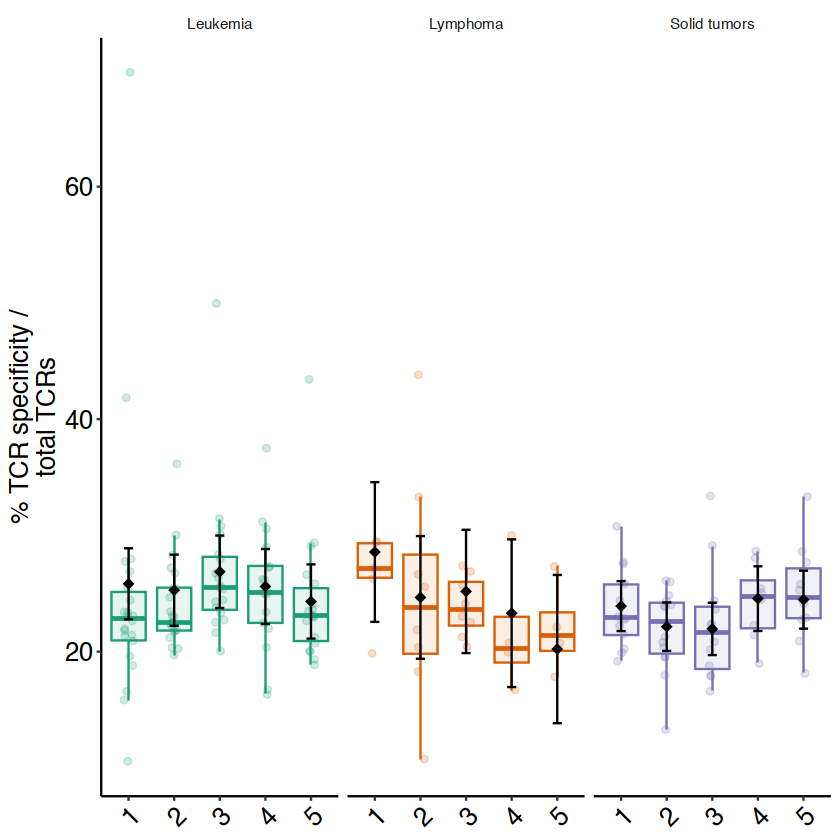

In [123]:
p1

In [126]:
pdf(paste0(plotpath, "p_converg_lsmeans.pdf"), width = 5, height = 3)
p1
dev.off()

pdf 
  2

# 2- GLIPH groups diversity

to account for cloneCounts and number of groups

## 2.1- GLIPH groups

In [277]:
ls()

[1] "addjurkat.fx"       "age_pal"            "align_plots1"      
 [4] "baseline_patients"  "baseplot.fx"        "cancergrp"         
 [7] "chp_gliph"          "chp_gliph_pbmc"     "cohort_col"        
[10] "components"         "components_sep"     "cycle_col"         
[13] "datapath"           "df1"                "df1_post"          
[16] "df1_post_mean"      "df1_pre"            "df1_pre_mean"      
[19] "gitpath"            "gliph_out"          "gliph_pat_mat"     
[22] "gliph_pat_mat_long" "gliphdf"            "gliphdf_original"  
[25] "group_col"          "h4hpath"            "histdenp"          
[28] "histp"              "i"                  "importantgliphs"   
[31] "j"                  "lsm"                "manifestpath"      
[34] "message_parallel"   "meta_div"           "myaxis"            
[37] "myctrt"             "myctrt_grp"         "myfit"             
[40] "myformula"          "mygliph"            "mylsm"             
[43] "mylsm_grp"          "mypattern"          "myplot"            
[46] "mypt"               "mypt_SumFreq"       "mysample"          
[49] "mysamples"          "mysig"              "mytab"             
[52] "n_gliph"            "out"                "p1"                
[55] "p2"                 "p3"                 "p4"                
[58] "pat_type"           "plotpath"           "pt_post"           
[61] "pt_pre"             "round_and_format"   "safe_mclapply"     
[64] "sample_subject_tab" "samples_tcr"        "sampletags_columns"
[67] "sampletype"         "text_matrix"        "tmp"               
[70] "toString_onefle.fx" "type_col"           "yuppp"

In [280]:
# add diversity of gliph groups
for (i in 1:nrow(samples_tcr)) {
  mypt <- tmp[tmp$Sample == rownames(samples_tcr)[i], ]

  # If there is more than one cdr3 in a pattern, sum the frequencies
  mypt_SumFreq <- mypt %>%
    group_by(pattern) %>%
    summarise(SumFreq = sum(Freq), .groups = "drop")
#message(rownames(samples_tcr)[i])
#print(mypt_SumFreq$SumFreq[order(mypt_SumFreq$SumFreq, decreasing = T)])
  out <- iNEXT::iNEXT(mypt_SumFreq$SumFreq[order(mypt_SumFreq$SumFreq, decreasing = T)], 0, datatype = "abundance")
  samples_tcr$gliph_div[i] <- out$AsyEst[1, 1] # Simpson
}


Warning message in BootstrapFun.abun(x = x, FunName, datatype, B):
"The Bootstrap community has only one species. Estimation is not robust."
Warning message in max(x[-1] > 1):
"no non-missing arguments to max; returning -Inf"
Warning message in BootstrapFun.abun(x = x, FunName, datatype, B):
"The Bootstrap community has only one species. Estimation is not robust."
Warning message in BootstrapFun.abun(x = x, FunName, datatype, B):
"The Bootstrap community has only one species. Estimation is not robust."
Warning message in max(x[-1] > 1):
"no non-missing arguments to max; returning -Inf"
Warning message in BootstrapFun.abun(x = x, FunName, datatype, B):
"The Bootstrap community has only one species. Estimation is not robust."
Warning message in BootstrapFun.abun(x = x, FunName, datatype, B):
"The Bootstrap community has only one species. Estimation is not robust."
Warning message in max(x[-1] > 1):
"no non-missing arguments to max; returning -Inf"
Warning message in BootstrapFun.abun(x =

In [281]:
sampletype <- samples_tcr[ samples_tcr$sampletype == "PBMC" &
samples_tcr$n_gliph > 3,] # to avoid error in diversity calculation

In [282]:
sampletype$gliph_div_log <- log10(sampletype$gliph_div)

In [283]:
cancergrp <- "Leukemia"

myformula <- as.formula(paste0("gliph_div_log", " ~ cycle + Age+ (1 | Patient)"))
myfit <- lme4::lmer(myformula, data = sampletype[ sampletype$cancergroup == cancergrp,]) # keep cycle as categorical
lsm <- lsmeans(myfit, "cycle")
mylsm_grp <- summary(lsm)
mylsm_grp$cancergroup <- cancergrp # has to be same as original df

myctrt_grp <- as.data.frame(lsmeans::contrast(lsm, "trt.vs.ctrl", ref = "X01"))
myctrt_grp$cancergroup <- cancergrp

for (i in c("Solidtumors", "Lymphoma")) {
    print(i)
    cancergrp <- i
    myfit <- lme4::lmer(myformula, data = sampletype[ sampletype$cancergroup == cancergrp,])
    lsm <- lsmeans(myfit, "cycle")
    myctrt <- as.data.frame(lsmeans::contrast(lsm, "trt.vs.ctrl", ref = "X01"))
    myctrt$cancergroup <- cancergrp
    myctrt_grp <- rbind(myctrt_grp, myctrt)

    mylsm <- summary(lsm)
    mylsm$cancergroup <- cancergrp
    mylsm_grp <- rbind(mylsm_grp, mylsm)
}

[1] "Solidtumors"
[1] "Lymphoma"


boundary (singular) fit: see help('isSingular')



In [284]:
myctrt_grp

contrast,estimate,SE,df,t.ratio,p.value,cancergroup
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
X02 - X01,0.36009335,0.1394025,70.45874,2.5831193,0.04180391,Leukemia
X03 - X01,0.21947431,0.1482168,76.38190,1.4807653,0.38764141,Leukemia
X04 - X01,0.20958422,0.1517751,80.59194,1.3808864,0.44598314,Leukemia
X05 - X01,0.34860856,0.1526106,81.91735,2.2843008,0.08425987,Leukemia
X02 - X01,-0.04529961,0.1883300,33.53780,-0.2405332,0.98777984,Solidtumors
X03 - X01,0.22369104,0.2174181,43.44556,1.0288521,0.66961213,Solidtumors
X04 - X01,-0.25959470,0.2287785,42.66721,-1.1346989,0.60347241,Solidtumors
X05 - X01,0.18087919,0.2184979,45.23868,0.8278303,0.78741184,Solidtumors
X02 - X01,-0.25444756,0.2651785,20.85372,-0.9595332,0.71531057,Lymphoma


In [132]:
# just for aes
sampletype$cancergroup[ sampletype$cancergroup == "Solidtumors" ] <- "Solid tumors"
sampletype$cancergroup[ sampletype$cancergroup == "T-cellmalignancies" ] <- "T-cell malignancies"

mylsm_grp$cancergroup[ mylsm_grp$cancergroup == "Solidtumors" ] <- "Solid tumors"
mylsm_grp$cancergroup[ mylsm_grp$cancergroup == "T-cellmalignancies" ] <- "T-cell malignancies"

myctrt_grp$cancergroup[ myctrt_grp$cancergroup == "Solidtumors" ] <- "Solid tumors"
myctrt_grp$cancergroup[ myctrt_grp$cancergroup == "T-cellmalignancies" ] <- "T-cell malignancies"

In [133]:
mylsm_grp$Cycle <- as.character(mylsm_grp$cycle)
mylsm_grp$Cycle <- as.numeric(gsub("X0", "", mylsm_grp$Cycle))

myctrt_grp$Cycle <- as.character(gsub(" - X01", "", myctrt_grp$contrast))
myctrt_grp$Cycle <- gsub("X0", "", myctrt_grp$Cycle)

In [134]:
head(sampletype)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,...,n_cdr3ingliph,cancergroup,cycle,sampletype,cyclenum,Patient,Age,converg,gliph_div,gliph_div_log
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Leukemia:CHP_323_X03-PBMC,2,0,1,0,0,16,0,0,0,1,...,12,Leukemia,X03,PBMC,3,CHP_323,1,26.66667,18.048,1.256429
Leukemia:CHP_323_X05-PBMC,1,0,0,0,2,47,0,0,0,1,...,36,Leukemia,X05,PBMC,5,CHP_323,1,23.52941,49.104,1.691117
Leukemia:CHP_328_X04-PBMC,1,2,2,0,10,145,1,0,0,0,...,124,Leukemia,X04,PBMC,4,CHP_328,7,27.31278,71.383,1.853595
Leukemia:CHP_328_X05-PBMC,2,1,2,0,0,55,1,0,0,1,...,35,Leukemia,X05,PBMC,5,CHP_328,7,22.87582,31.984,1.504933
Leukemia:CHP_331_X04-PBMC,0,0,0,0,0,10,0,0,0,0,...,6,Leukemia,X04,PBMC,4,CHP_331,5,16.66667,11.391,1.056562
Leukemia:CHP_331_X05-PBMC,0,0,1,0,4,36,0,0,0,0,...,37,Leukemia,X05,PBMC,5,CHP_331,5,23.56688,31.453,1.497662


In [135]:
sampletype$Cycle <- as.character(sampletype$cyclenum)

In [137]:
mysig <- myctrt_grp
mysig <- mysig[ mysig$p.value < 0.05,]
mysig$p.val <- sapply(mysig$p.value, function(x) round_and_format(x) )

In [138]:
p2 <- baseplot.fx(mydf = sampletype, x = "Cycle", y = "gliph_div_log", fill = "cancergroup", clr = "cancergroup", colpal = group_col) +
    geom_errorbar(data = mylsm_grp, aes(x = Cycle, y = lsmean, ymin = lower.CL, ymax = upper.CL), color = "black", width = 0.2) +
    geom_point(data = mylsm_grp, aes(x = Cycle, y = lsmean), color = "black", shape = 18, size = 3) +
    geom_signif(
            data = mysig,
            aes(xmin = "1", xmax = Cycle, annotations = p.val, y_position = c(2.7,2.7)),
            textsize = 3, vjust = -0.2, color = "black",
            manual = TRUE
        ) +
    annotation_logticks(sides = "l") + scale_y_continuous(breaks = log10(c(0,10,100,500)), labels = c(0,10,100,500) ) +
    facet_wrap(~cancergroup, nrow = 1, scales = "fixed", strip.position = "top") +
    theme(
        axis.title.x = element_blank(),
        legend.position = "none",
        strip.background.x = element_blank(),
        strip.placement = "outside"
    ) + ylab(" GLIPH Simpson diversity")

Warning message in geom_signif(data = mysig, aes(xmin = "1", xmax = Cycle, annotations = p.val, :
"Ignoring unknown aesthetics: xmin, xmax, annotations, and y_position"


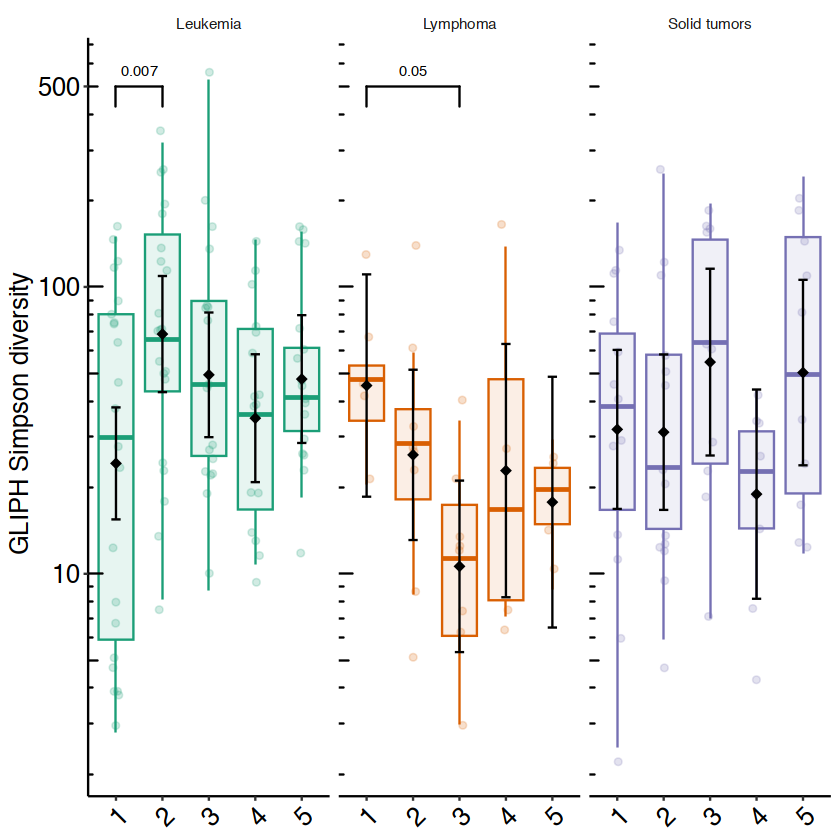

In [139]:
p2 

In [140]:
pdf(paste0(plotpath, "p_gliph_simpdiv_lsmeans.pdf"), width = 5, height = 3)
p2 #+  annotation_logticks(sides = "l") + scale_y_continuous(breaks = log10(c(0,10,100,500)), labels = c(0,10,100,500) )
dev.off()

pdf 
  2

## 2.2 Components

In [141]:
h4hpath

[1] "/Users/anabbi/Desktop/H4H/INTERCEPT/analysis/GLIPH/run_gliph/"

In [142]:
components <- readr::read_csv(paste0(h4hpath, "v5/gliph_downstream_output/INTERCEPT_CDR3_GLIPHII_Component_Stats.csv"))

Rows: 319 Columns: 10
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (5): PatientDerived_Nodes, Sample_Type_Range, Timepoint_Range, Component...
dbl (5): Component_id, Component_size, NumberOf_PatientDerived_Nodes, Number...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [143]:
components_sep <- tidyr::separate_rows(components, PatientDerived_Nodes, sep = ",")

In [144]:
components_sep$CDR3 <- gsub("_(.*)$","", components_sep$PatientDerived_Nodes)
components_sep$Sample <- gsub("^[^_]*_","", components_sep$PatientDerived_Nodes)

In [146]:
# add diversity of gliph groups
for (i in 1:nrow(samples_tcr)) {
  mypt <- components_sep[ components_sep$Sample == rownames(samples_tcr)[i], ]
if(nrow(mypt) == 0) {
  samples_tcr$n_comp[i] <- NA
} else {
  samples_tcr$n_comp[i] <- length(unique(mypt$Component_id))
} 
}

In [148]:
gliph_out$cdr3_sample <- paste(gliph_out$TcRb, gliph_out$Sample, sep = "_") # original gliph output to include those cdr3s that are in input but we removed for super small gliph groups in dataframe tmp

In [149]:
components_sep$Freq <- gliph_out$Freq[ match(components_sep$PatientDerived_Nodes, gliph_out$cdr3_sample)]

In [150]:
# add diversity of gliph groups
for (i in 1:nrow(samples_tcr)) {
  mypt <- components_sep[ components_sep$Sample == rownames(samples_tcr)[i], ]
if(nrow(mypt) == 0) {
  samples_tcr$comp_div[i] <- NA
} else {
  # If there is more than one cdr3 in a pattern, sum the frequencies
  mypt_SumFreq <- mypt %>%
    group_by(Component_id) %>%
    summarise(SumFreq = sum(Freq), .groups = "drop") %>%
    ungroup()

  out <- iNEXT::iNEXT(mypt_SumFreq$SumFreq[order(mypt_SumFreq$SumFreq, decreasing = T)], 0, datatype = "abundance")
  samples_tcr$comp_div[i] <- out$AsyEst[3, 1] # Simpson
} 
}


Warning message in BootstrapFun.abun(x = x, FunName, datatype, B):
"The Bootstrap community has only one species. Estimation is not robust."
Warning message in max(x[-1] > 1):
"no non-missing arguments to max; returning -Inf"
Warning message in BootstrapFun.abun(x = x, FunName, datatype, B):
"The Bootstrap community has only one species. Estimation is not robust."
Warning message in BootstrapFun.abun(x = x, FunName, datatype, B):
"The Bootstrap community has only one species. Estimation is not robust."
Warning message in max(x[-1] > 1):
"no non-missing arguments to max; returning -Inf"
Warning message in BootstrapFun.abun(x = x, FunName, datatype, B):
"The Bootstrap community has only one species. Estimation is not robust."
Warning message in BootstrapFun.abun(x = x, FunName, datatype, B):
"The Bootstrap community has only one species. Estimation is not robust."
Warning message in max(x[-1] > 1):
"no non-missing arguments to max; returning -Inf"
Warning message in BootstrapFun.abun(x =

In [152]:
head(samples_tcr)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,...,cancergroup,cycle,sampletype,cyclenum,Patient,Age,converg,gliph_div,n_comp,comp_div
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
Leukemia:CHP_319_X05-PBMC,0,0,0,0,0,2,0,0,0,0,...,Leukemia,X05,PBMC,5,CHP_319,1,20.00000,2.455,2,1.471
Leukemia:CHP_323_X03-PBMC,2,0,1,0,0,16,0,0,0,1,...,Leukemia,X03,PBMC,3,CHP_323,1,26.66667,18.048,3,1.953
Leukemia:CHP_323_X03-cfDNA,2,0,0,0,4,33,0,0,0,0,...,Leukemia,X03,cfDNA,3,CHP_323,1,24.27184,21.050,3,1.165
Leukemia:CHP_323_X05-PBMC,1,0,0,0,2,47,0,0,0,1,...,Leukemia,X05,PBMC,5,CHP_323,1,23.52941,49.104,4,1.507
Leukemia:CHP_323_X05-cfDNA,0,0,0,0,0,4,0,0,0,0,...,Leukemia,X05,cfDNA,5,CHP_323,1,13.33333,5.997,2,1.999
Leukemia:CHP_326_X05-cfDNA,0,0,3,0,0,5,0,0,0,0,...,Leukemia,X05,cfDNA,5,CHP_326,4,16.00000,5.418,2,1.997


In [174]:
table(samples_tcr$cancergroup, useNA = "always")



   Leukemia    Lymphoma Solidtumors        <NA> 
        194          64         129           0 

In [201]:
sampletype <- samples_tcr[ samples_tcr$sampletype == "PBMC" , ]
sampletype <- sampletype[ which(sampletype$n_comp > 3) , ]

In [202]:
table(sampletype$cancergroup, useNA = "always")


   Leukemia    Lymphoma Solidtumors        <NA> 
         71          18          38           0 

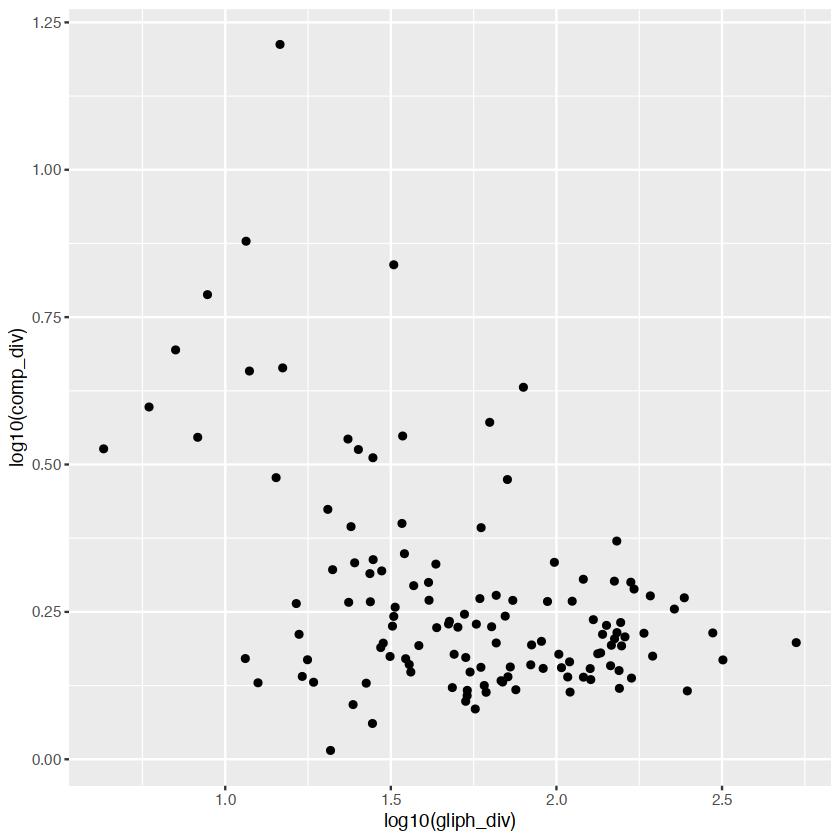

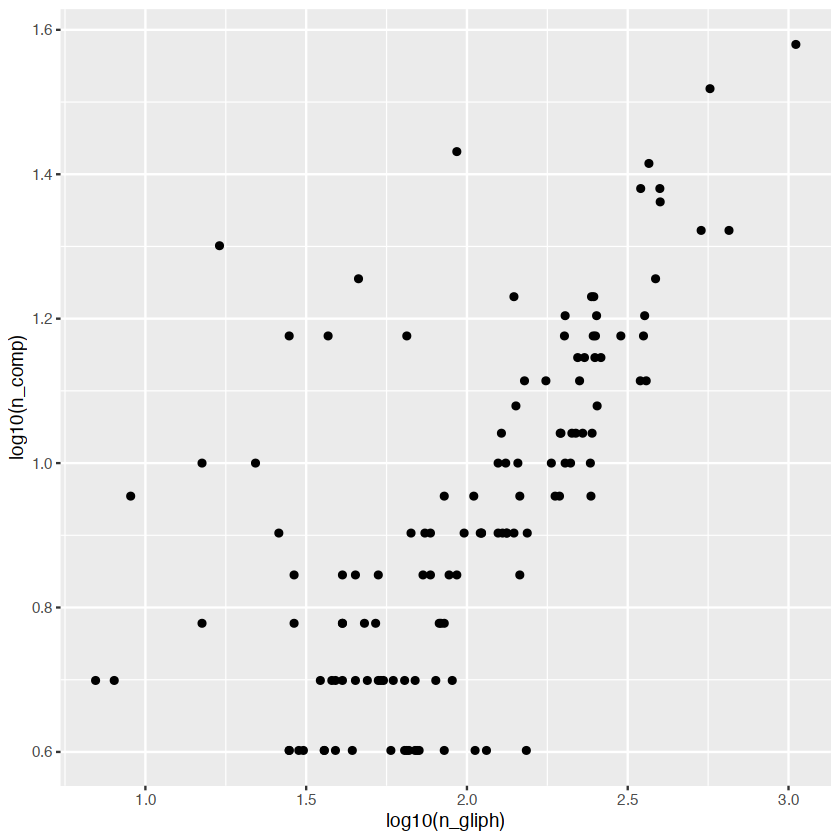

In [203]:
ggplot(sampletype, aes( y= log10(comp_div), x = log10(gliph_div))) + geom_point()

ggplot(sampletype, aes( y= log10(n_comp), x = log10(n_gliph))) + geom_point()

In [204]:
table(sampletype$cancergroup, useNA = "ifany")


   Leukemia    Lymphoma Solidtumors 
         71          18          38 

In [205]:
sampletype$comp_div_log <- log10(sampletype$comp_div)

In [206]:
cancergrp <- "Leukemia"

myformula <- as.formula(paste0("comp_div_log", " ~ cycle + Age + (1 | Patient)"))
myfit <- lme4::lmer(myformula, data = sampletype[ sampletype$cancergroup == cancergrp,]) # keep cycle as categorical
lsm <- lsmeans(myfit, "cycle")
mylsm_grp <- summary(lsm)
mylsm_grp$cancergroup <- cancergrp # has to be same as original df

myctrt_grp <- as.data.frame(lsmeans::contrast(lsm, "trt.vs.ctrl", ref = "X01"))
myctrt_grp$cancergroup <- cancergrp

for (i in c("Solidtumors", "Lymphoma")) {
    print(i)
    cancergrp <- i
    myfit <- lme4::lmer(myformula, data = sampletype[ sampletype$cancergroup == cancergrp,])
    lsm <- lsmeans(myfit, "cycle")
    myctrt <- as.data.frame(lsmeans::contrast(lsm, "trt.vs.ctrl", ref = "X01"))
    myctrt$cancergroup <- cancergrp
    myctrt_grp <- rbind(myctrt_grp, myctrt)

    mylsm <- summary(lsm)
    mylsm$cancergroup <- cancergrp
    mylsm_grp <- rbind(mylsm_grp, mylsm)
}

[1] "Solidtumors"
[1] "Lymphoma"


In [207]:
myctrt_grp

contrast,estimate,SE,df,t.ratio,p.value,cancergroup
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
X02 - X01,0.029689639,0.05306148,53.009369,0.55953285,0.9110039,Leukemia
X03 - X01,0.020996956,0.05579329,57.205699,0.37633480,0.9647555,Leukemia
X04 - X01,0.076278636,0.05773818,55.913246,1.32111263,0.4847532,Leukemia
X05 - X01,0.004000926,0.05478521,61.094538,0.07302931,0.9992826,Leukemia
X02 - X01,0.134776639,0.10107148,20.202972,1.33347848,0.4894957,Solidtumors
X03 - X01,-0.047505914,0.13110001,29.410899,-0.36236392,0.9677334,Solidtumors
X04 - X01,0.131400917,0.12820048,29.207090,1.02496430,0.6740069,Solidtumors
X05 - X01,0.037378229,0.12073801,30.120966,0.30958128,0.9777582,Solidtumors
X02 - X01,0.093472981,0.12784804,8.104808,0.73112563,0.8417054,Lymphoma


In [208]:
# just for aes
sampletype$cancergroup[ sampletype$cancergroup == "Solidtumors" ] <- "Solid tumors"
sampletype$cancergroup[ sampletype$cancergroup == "T-cellmalignancies" ] <- "T-cell malignancies"

mylsm_grp$cancergroup[ mylsm_grp$cancergroup == "Solidtumors" ] <- "Solid tumors"
mylsm_grp$cancergroup[ mylsm_grp$cancergroup == "T-cellmalignancies" ] <- "T-cell malignancies"

myctrt_grp$cancergroup[ myctrt_grp$cancergroup == "Solidtumors" ] <- "Solid tumors"
myctrt_grp$cancergroup[ myctrt_grp$cancergroup == "T-cellmalignancies" ] <- "T-cell malignancies"

In [209]:
mylsm_grp$Cycle <- as.character(mylsm_grp$cycle)
mylsm_grp$Cycle <- as.numeric(gsub("X0", "", mylsm_grp$Cycle))

myctrt_grp$Cycle <- as.character(gsub(" - X01", "", myctrt_grp$contrast))
myctrt_grp$Cycle <- gsub("X0", "", myctrt_grp$Cycle)

In [210]:
head(sampletype)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,...,cycle,sampletype,cyclenum,Patient,Age,converg,gliph_div,n_comp,comp_div,comp_div_log
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
Leukemia:CHP_323_X05-PBMC,1,0,0,0,2,47,0,0,0,1,...,X05,PBMC,5,CHP_323,1,23.52941,49.104,4,1.507,0.1781133
Leukemia:CHP_328_X04-PBMC,1,2,2,0,10,145,1,0,0,0,...,X04,PBMC,4,CHP_328,7,27.31278,71.383,11,1.380,0.1398791
Leukemia:CHP_328_X05-PBMC,2,1,2,0,0,55,1,0,0,1,...,X05,PBMC,5,CHP_328,7,22.87582,31.984,7,1.682,0.2258260
Leukemia:CHP_331_X05-PBMC,0,0,1,0,4,36,0,0,0,0,...,X05,PBMC,5,CHP_331,5,23.56688,31.453,5,1.494,0.1743506
Leukemia:CHP_338_X03-PBMC,6,1,3,0,9,135,0,0,0,2,...,X03,PBMC,3,CHP_338,13,22.71762,126.946,9,1.365,0.1351327
Leukemia:CHP_338_X04-PBMC,4,0,0,2,1,49,0,0,0,1,...,X04,PBMC,4,CHP_338,13,26.25000,12.558,5,1.348,0.1296899


In [211]:
sampletype$Cycle <- as.character(sampletype$cyclenum)

In [212]:
p3 <- baseplot.fx(mydf = sampletype, x = "Cycle", y = "comp_div_log", fill = "cancergroup", clr = "cancergroup", colpal = group_col) +
    geom_errorbar(data = mylsm_grp, aes(x = Cycle, y = lsmean, ymin = lower.CL, ymax = upper.CL), color = "black", width = 0.2) +
    geom_point(data = mylsm_grp, aes(x = Cycle, y = lsmean), color = "black", shape = 18, size = 3) +
    annotation_logticks(sides = "l") + scale_y_continuous(breaks = log10(c(0,10,100,500)), labels = c(0,10,100,500) ) +
    facet_wrap(~cancergroup, nrow = 1, scales = "fixed", strip.position = "top") +
    theme(
        axis.title.x = element_blank(),
        legend.position = "none",
        strip.background.x = element_blank(),
        strip.placement = "outside"
    ) + ylab(" GLIPH components Simpson diversity")

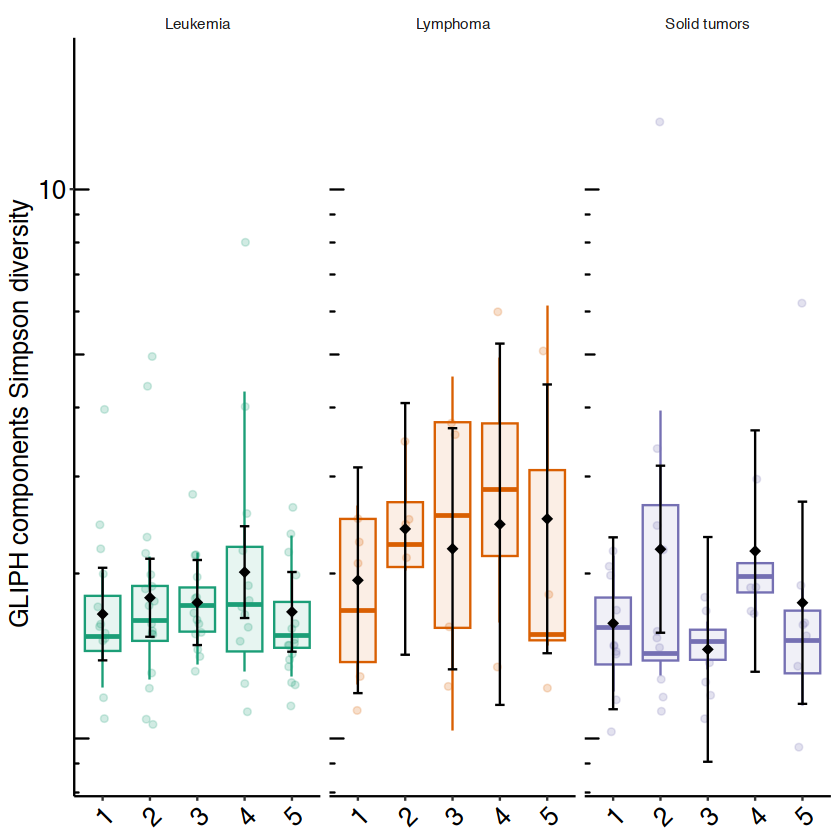

In [213]:
p3 

In [214]:
pdf(paste0(plotpath, "p_gliphcomponents_simpdiv_lsmeans.pdf"), width = 6, height = 3)
p3 #+  annotation_logticks(sides = "l") + scale_y_continuous(breaks = log10(c(0,10,100,500)), labels = c(0,10,100,500) )
dev.off()

pdf 
  2

# 3 - Fisher scores vs difference

In [285]:
chp_gliph <- tmp[ grepl("CHP", tmp$Sample), ]
chp_gliph <- chp_gliph[!grepl("Normal", chp_gliph$subject),]

In [286]:
table(chp_gliph$subject)


          Leukemia           Lymphoma        Solidtumors T-cellmalignancies 
             15148               1891               6907               1244 

In [287]:
chp_gliph_pbmc <- chp_gliph[grepl("PBMC", chp_gliph$Sample),]

In [288]:
chp_gliph_pbmc$Patient <- gsub(".*CHP", "CHP", chp_gliph_pbmc$Sample)
chp_gliph_pbmc$Patient <- gsub("_X.*", "", chp_gliph_pbmc$Patient)

In [289]:
chp_gliph_pbmc$cycle <- gsub(".*X", "X", chp_gliph_pbmc$Sample)
chp_gliph_pbmc$cycle <- gsub("-.*", "", chp_gliph_pbmc$cycle)

In [290]:
head(chp_gliph_pbmc)

index,pattern,Fisher_score,number_subject,number_unique_cdr3,final_score,hla_score,vb_score,expansion_score,length_score,...,type,TcRb,V,J,TcRa,Sample,Freq,subject,Patient,cycle
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,SLG%E,0,5,50,5e-12,1,0.001,0.35,0.001,...,global-SLG%E,CASSLGVEQYF,TRBV27,TRBJ2-7,NA,Leukemia:CHP_359_X03-PBMC,24,Leukemia,CHP_359,X03
1,SLG%E,0,5,50,5e-12,1,0.001,0.35,0.001,...,global-SLG%E,CASSLGYEQFF,TRBV27,TRBJ2-1,NA,Lymphoma:CHP_371_X01-PBMC,8,Lymphoma,CHP_371,X01
1,SLG%E,0,5,50,5e-12,1,0.001,0.35,0.001,...,global-SLG%E,CASSLGYEQYF,TRBV28,TRBJ2-7,NA,Leukemia:CHP_360_X05-PBMC,10,Leukemia,CHP_360,X05
1,SLG%E,0,5,50,5e-12,1,0.001,0.35,0.001,...,global-SLG%E,CASSLGYEQYF,TRBV11-3,TRBJ2-7,NA,Solidtumors:CHP_363_X01-PBMC,41,Solidtumors,CHP_363,X01
1,SLG%E,0,5,50,5e-12,1,0.001,0.35,0.001,...,global-SLG%E,CASSLGYEQYF,TRBV7-9,TRBJ2-7,NA,Leukemia:CHP_328_X05-PBMC,28,Leukemia,CHP_328,X05
1,SLG%E,0,5,50,5e-12,1,0.001,0.35,0.001,...,global-SLG%E,CASSLGYEQYF,TRBV7-9,TRBJ2-7,NA,Leukemia:CHP_328_X05-PBMC,1,Leukemia,CHP_328,X05


In [291]:
# get patients with more than one timepoiint and a baseline
mytab <- table(chp_gliph_pbmc$Patient, chp_gliph_pbmc$cycle)
mytab <- mytab[rowSums(mytab != 0) > 1, ]
baseline_patients <- rownames(mytab)[mytab[, 1] > 0]

In [292]:
head(mytab)

         
          X01 X02 X03 X04 X05
  CHP_323   0   0  21   0  72
  CHP_328   0   0   0 255  84
  CHP_331   0   0   0  15  60
  CHP_338   0   0 202  64 147
  CHP_339   0   0  10   0  91
  CHP_340   0   0  56  70 232

In [293]:
df1 <- chp_gliph_pbmc[chp_gliph_pbmc$Patient %in% baseline_patients, ]

In [294]:
# chp_gliph_pbmc[ chp_gliph_pbmc$Patient == "CHP_366" & chp_gliph_pbmc$pattern %in% c("SY%GGDE", "SYS%GDE"),]

In [295]:
# separate pre and post
df1_pre <- df1[ df1$cycle == "X01",]
df1_post <- df1[ df1$cycle != "X01",]

In [296]:
# group by patient and pattern, average frequencyes across samples postchemo
df1_post_mean <- df1_post %>%
  group_by(Patient, pattern) %>%
  summarise(MeanFreq = mean(Freq), .groups = 'drop') %>%
  ungroup()

In [297]:
# group by samples and patterns, avergae the frequencies, if there is > 1 CDR3s in a pattern
df1_pre_mean <- df1_pre %>%
  group_by(Sample, pattern) %>%
  summarise(MeanFreq = mean(Freq), .groups = 'drop') %>%
  ungroup()

In [298]:
df1_post[ df1_post$pattern == "S%RDNQP",]

index,pattern,Fisher_score,number_subject,number_unique_cdr3,final_score,hla_score,vb_score,expansion_score,length_score,...,type,TcRb,V,J,TcRa,Sample,Freq,subject,Patient,cycle
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<chr>
17667,S%RDNQP,0.0092,2,3,1.8e-08,1,0.046,0.062,0.001,...,global-S%RDNQP,CASSDRDNQPQHF,TRBV28,TRBJ1-5,NA,Lymphoma:CHP_412_X02-PBMC,108,Lymphoma,CHP_412,X02


In [299]:
head(df1_post_mean)

Patient,pattern,MeanFreq
<chr>,<chr>,<dbl>
CHP_347,%DSNTGE,3.0
CHP_347,%FGAYE,9.0
CHP_347,%GGYE,8.0
CHP_347,%GPTNEK,46.0
CHP_347,%GQGNTE,8.0
CHP_347,%GQSNTGE,8.5


In [300]:
head(df1_pre_mean)

Sample,pattern,MeanFreq
<chr>,<chr>,<dbl>
Leukemia:CHP_347_X01-PBMC,%GNTE,25
Leukemia:CHP_347_X01-PBMC,%GSTDT,9
Leukemia:CHP_347_X01-PBMC,%LADYE,20
Leukemia:CHP_347_X01-PBMC,G%STDT,9
Leukemia:CHP_347_X01-PBMC,GG%TDT,9
Leukemia:CHP_347_X01-PBMC,GR%NTGE,77


In [301]:
df1_pre_mean$Patient <- gsub(".*CHP", "CHP", df1_pre_mean$Sample)
df1_pre_mean$Patient <- gsub("_X.*", "", df1_pre_mean$Patient)

df1_pre_mean$cycle <- gsub(".*X", "X", df1_pre_mean$Sample)
df1_pre_mean$cycle <- gsub("-.*", "", df1_pre_mean$cycle)

In [302]:
head(df1_pre_mean)

Sample,pattern,MeanFreq,Patient,cycle
<chr>,<chr>,<dbl>,<chr>,<chr>
Leukemia:CHP_347_X01-PBMC,%GNTE,25,CHP_347,X01
Leukemia:CHP_347_X01-PBMC,%GSTDT,9,CHP_347,X01
Leukemia:CHP_347_X01-PBMC,%LADYE,20,CHP_347,X01
Leukemia:CHP_347_X01-PBMC,G%STDT,9,CHP_347,X01
Leukemia:CHP_347_X01-PBMC,GG%TDT,9,CHP_347,X01
Leukemia:CHP_347_X01-PBMC,GR%NTGE,77,CHP_347,X01


In [303]:
# matrix gliph x patient
gliph_pat_mat <- matrix(NA,
    nrow = length(unique(df1$pattern)), ncol = length(unique(df1$Patient)),
    dimnames = list(unique(df1$pattern), unique(df1$Patient))
)

In [304]:
head(gliph_pat_mat)

,CHP_363,CHP_381,CHP_366,CHP_347,CHP_369,CHP_399,CHP_405,CHP_350,CHP_353,CHP_396,...,CHP_378,CHP_373,CHP_362,CHP_348,CHP_397,CHP_349,CHP_412,CHP_364,CHP_367,CHP_361
SLG%E,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
S%GGNTE,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
WVYE,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
YDTG,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
S%TGNTE,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
S%SGANV,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [305]:
for (i in 1:nrow(gliph_pat_mat)) { # pattern loop
    for (j in 1:ncol(gliph_pat_mat)) { # patient loop
        mypattern <- rownames(gliph_pat_mat)[i]
        mypt <- colnames(gliph_pat_mat)[j]
        pt_pre <- df1_pre_mean[df1_pre_mean$Patient == mypt, ]
        pt_post <- df1_post_mean[df1_post_mean$Patient == mypt, ]
        if (length(pt_pre$MeanFreq[pt_pre$pattern == mypattern]) != 0 && length(pt_post$MeanFreq[pt_post$pattern == mypattern]) != 0) { # if pattern is present in both pre and post
            gliph_pat_mat[i, j] <- pt_post$MeanFreq[pt_post$pattern == mypattern] - pt_pre$MeanFreq[pt_pre$pattern == mypattern] # post - pre
        } # end of if
    } # end of patient loop
} # end of pattern loop

In [306]:
gliph_pat_mat <- as.data.frame(gliph_pat_mat)

In [307]:
# Add Fisher score to gliph_pat_mat
gliph_pat_mat$fisher <- df1$Fisher_score[match(rownames(gliph_pat_mat), df1$pattern)]

In [308]:
gliph_pat_mat$gliph <- rownames(gliph_pat_mat)

In [309]:
head(gliph_pat_mat)

,CHP_363,CHP_381,CHP_366,CHP_347,CHP_369,CHP_399,CHP_405,CHP_350,CHP_353,CHP_396,...,CHP_362,CHP_348,CHP_397,CHP_349,CHP_412,CHP_364,CHP_367,CHP_361,fisher,gliph
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
SLG%E,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,0.0e+00,SLG%E
S%GGNTE,NA,-109,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,0.0e+00,S%GGNTE
WVYE,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,0.0e+00,WVYE
YDTG,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,0.0e+00,YDTG
S%TGNTE,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,2.3e-41,S%TGNTE
S%SGANV,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,7.5e-41,S%SGANV


In [310]:
# long format keep fisher and gliph as columns
gliph_pat_mat_long <- tidyr::pivot_longer(gliph_pat_mat, -c("fisher", "gliph"), names_to = "Patient", values_to = "Delta")

In [311]:
# remove rows with NA
gliph_pat_mat_long <- gliph_pat_mat_long[ !is.na(gliph_pat_mat_long$Delta), ]

In [312]:
head(gliph_pat_mat)

,CHP_363,CHP_381,CHP_366,CHP_347,CHP_369,CHP_399,CHP_405,CHP_350,CHP_353,CHP_396,...,CHP_362,CHP_348,CHP_397,CHP_349,CHP_412,CHP_364,CHP_367,CHP_361,fisher,gliph
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
SLG%E,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,0.0e+00,SLG%E
S%GGNTE,NA,-109,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,0.0e+00,S%GGNTE
WVYE,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,0.0e+00,WVYE
YDTG,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,0.0e+00,YDTG
S%TGNTE,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,2.3e-41,S%TGNTE
S%SGANV,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,7.5e-41,S%SGANV


In [313]:
head(gliph_pat_mat_long)

fisher,gliph,Patient,Delta
<dbl>,<chr>,<chr>,<dbl>
0.0e+00,S%GGNTE,CHP_381,-109.0
2.3e-41,S%TGNTE,CHP_365,-23.0
1.7e-36,SLQG%E,CHP_378,-2.0
5.2e-25,SLG%NTE,CHP_381,-61.5
5.2e-25,SLG%NTE,CHP_369,-486.0
5.2e-25,S%GGSYNE,CHP_365,48.0


In [320]:
gliphdf_original <- gliphdf # save original gliphdf

In [321]:
# gliphdf[, 2:12][gliphdf[, 2:12] > 0] <- 1 # count each group only once

In [322]:
head(gliphdf)

,gliph,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,S-pneumoniae,n_unique_cdr3
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SLG%E,SLG%E,0,0,0,0,0,1,0,0,0,0,0,50
S%GGNTE,S%GGNTE,0,0,0,0,1,1,0,0,0,0,0,41
GIWV,GIWV,0,0,0,0,0,0,0,0,0,0,0,82
IWV,IWV,0,0,0,0,1,0,0,0,0,0,0,97
WVYE,WVYE,0,0,0,0,0,0,0,0,0,0,0,98
IWVY,IWVY,0,0,0,0,0,0,0,0,0,0,0,95


In [323]:
# Add annotations to gliph_pat_mat_long
gliph_pat_mat_long$CMV <- gliphdf$CMV[match(gliph_pat_mat_long$gliph, gliphdf$gliph)]
gliph_pat_mat_long$Flu <- gliphdf$Influenza[match(gliph_pat_mat_long$gliph, gliphdf$gliph)]
gliph_pat_mat_long$HCV <- gliphdf$HCV[match(gliph_pat_mat_long$gliph, gliphdf$gliph)]
gliph_pat_mat_long$EBV <- gliphdf$EBV[match(gliph_pat_mat_long$gliph, gliphdf$gliph)]
gliph_pat_mat_long$HPV <- gliphdf$HPV[match(gliph_pat_mat_long$gliph, gliphdf$gliph)]
gliph_pat_mat_long$HS <- gliphdf$HomoSapiens[match(gliph_pat_mat_long$gliph, gliphdf$gliph)]
gliph_pat_mat_long$CEF <- gliphdf$CEF[match(gliph_pat_mat_long$gliph, gliphdf$gliph)]
gliph_pat_mat_long$TB <- gliphdf$TB[match(gliph_pat_mat_long$gliph, gliphdf$gliph)]
gliph_pat_mat_long$SP <- gliphdf$`S-pneumoniae`[match(gliph_pat_mat_long$gliph, gliphdf$gliph)]
gliph_pat_mat_long$MCPyV <- gliphdf$MCPyV[match(gliph_pat_mat_long$gliph, gliphdf$gliph)]
gliph_pat_mat_long$MDavis <- gliphdf$MDavis[match(gliph_pat_mat_long$gliph, gliphdf$gliph)]

In [324]:
gliph_pat_mat_long$n_unique_cdr3 <- gliphdf$n_unique_cdr3[match(gliph_pat_mat_long$gliph, gliphdf$gliph)]

In [325]:
gliph_pat_mat_long$cancergroup <- meta_div$cancergroup[match(gliph_pat_mat_long$Patient, meta_div$Patient)]
gliph_pat_mat_long$Disease <- meta_div$Disease_type[match(gliph_pat_mat_long$Patient, meta_div$Patient)]

In [326]:
head(gliph_pat_mat_long)

fisher,gliph,Patient,Delta,CMV,Flu,HCV,EBV,HPV,HS,CEF,TB,SP,MCPyV,MDavis,n_unique_cdr3,cancergroup,Disease
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.0e+00,S%GGNTE,CHP_381,-109.0,0,0,0,0,0,1,0,0,0,0,1,41,Solid tumors,EWS
2.3e-41,S%TGNTE,CHP_365,-23.0,0,0,0,0,0,0,0,0,0,0,1,34,Leukemia,ALL
1.7e-36,SLQG%E,CHP_378,-2.0,0,0,0,0,1,0,0,0,0,0,1,32,Leukemia,ALL
5.2e-25,SLG%NTE,CHP_381,-61.5,0,0,0,0,0,0,0,0,0,0,1,22,Solid tumors,EWS
5.2e-25,SLG%NTE,CHP_369,-486.0,0,0,0,0,0,0,0,0,0,0,1,22,Leukemia,AML
5.2e-25,S%GGSYNE,CHP_365,48.0,0,0,0,0,0,0,0,0,0,0,1,22,Leukemia,ALL


In [327]:
length(unique(gliph_pat_mat_long$Patient))

[1] 28

In [328]:
quantile(gliph_pat_mat_long$Delta, c(0.1, 0.9))

10%  90% 
-204  431

In [329]:
head(gliph_pat_mat_long)

fisher,gliph,Patient,Delta,CMV,Flu,HCV,EBV,HPV,HS,CEF,TB,SP,MCPyV,MDavis,n_unique_cdr3,cancergroup,Disease
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.0e+00,S%GGNTE,CHP_381,-109.0,0,0,0,0,0,1,0,0,0,0,1,41,Solid tumors,EWS
2.3e-41,S%TGNTE,CHP_365,-23.0,0,0,0,0,0,0,0,0,0,0,1,34,Leukemia,ALL
1.7e-36,SLQG%E,CHP_378,-2.0,0,0,0,0,1,0,0,0,0,0,1,32,Leukemia,ALL
5.2e-25,SLG%NTE,CHP_381,-61.5,0,0,0,0,0,0,0,0,0,0,1,22,Solid tumors,EWS
5.2e-25,SLG%NTE,CHP_369,-486.0,0,0,0,0,0,0,0,0,0,0,1,22,Leukemia,AML
5.2e-25,S%GGSYNE,CHP_365,48.0,0,0,0,0,0,0,0,0,0,0,1,22,Leukemia,ALL


In [254]:
gliph_pat_mat_long[ duplicated(gliph_pat_mat_long$gliph),]

fisher,gliph,Patient,Delta,CMV,Flu,HCV,EBV,HPV,HS,CEF,TB,SP,MCPyV,MDavis,n_unique_cdr3,cancergroup,Disease
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
5.2e-25,SLG%NTE,CHP_369,486,0,0,0,0,0,0,0,0,0,0,1,22,Leukemia,AML
3.9e-18,SL%GE,CHP_410,-22,0,0,0,0,0,0,0,0,0,0,1,23,Leukemia,ALL
9.5e-02,S%,CHP_365,-125,0,0,0,0,0,0,0,0,0,0,0,12,Leukemia,ALL


In [330]:
# 3 groups common among more than 1 patient

In [331]:
gliph_pat_mat_long[ gliph_pat_mat_long$gliph %in% c("SLG%NTE", "SL%GE", "S%"),]

fisher,gliph,Patient,Delta,CMV,Flu,HCV,EBV,HPV,HS,CEF,TB,SP,MCPyV,MDavis,n_unique_cdr3,cancergroup,Disease
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
5.2e-25,SLG%NTE,CHP_381,-61.5,0,0,0,0,0,0,0,0,0,0,1,22,Solid tumors,EWS
5.2e-25,SLG%NTE,CHP_369,-486.0,0,0,0,0,0,0,0,0,0,0,1,22,Leukemia,AML
3.9e-18,SL%GE,CHP_381,-1.0,0,0,0,0,0,0,0,0,0,0,1,23,Solid tumors,EWS
3.9e-18,SL%GE,CHP_410,22.0,0,0,0,0,0,0,0,0,0,0,1,23,Leukemia,ALL
9.5e-02,S%,CHP_396,-96.0,0,0,0,0,0,0,0,0,0,0,0,12,Leukemia,HR ALL
9.5e-02,S%,CHP_365,125.0,0,0,0,0,0,0,0,0,0,0,0,12,Leukemia,ALL


In [336]:
# Group antigens into categories
gliph_pat_mat_long$antigen <- NA
for (i in 1:nrow(gliph_pat_mat_long)) {

    if (rowSums(gliph_pat_mat_long[i, c("CMV", "Flu", "HCV", "EBV", "HPV", "MCPyV")]) > 0) {
        gliph_pat_mat_long$antigen[i] <- "Viral"
    }
    if (rowSums(gliph_pat_mat_long[i, "HS"]) > 0) {
        gliph_pat_mat_long$antigen[i] <- "HomoSapiens"
    }
    if (rowSums(gliph_pat_mat_long[i, "HS"]) > 0 && rowSums(gliph_pat_mat_long[i, c("CMV", "Flu", "HCV", "EBV", "HPV", "MCPyV")]) > 0) {
        gliph_pat_mat_long$antigen[i] <- "Cross-reactive"
    }
}

In [337]:
gliph_pat_mat_long$antigen[ is.na(gliph_pat_mat_long$antigen)] <- "Unknown"

In [369]:
gliph_pat_mat_long$log10fisher <- -log10(gliph_pat_mat_long$fisher)

In [372]:
gliph_pat_mat_long[ gliph_pat_mat_long$antigen == "Cross-reactive" ,]

fisher,gliph,Patient,Delta,CMV,Flu,HCV,EBV,HPV,HS,CEF,TB,SP,MCPyV,MDavis,n_unique_cdr3,cancergroup,Disease,antigen,log10fisher
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
6.8e-14,S%GGE,CHP_368,4,0,0,1,0,0,1,0,0,1,0,1,23,Solid tumors,ARMS,Cross-reactive,13.167491
4.5e-08,SL%GSYE,CHP_357,-35,0,0,1,1,0,1,0,0,0,0,0,9,Leukemia,AML,Cross-reactive,7.346787


In [371]:
gliph_pat_mat_long[ gliph_pat_mat_long$antigen == "Viral" ,]

fisher,gliph,Patient,Delta,CMV,Flu,HCV,EBV,HPV,HS,CEF,TB,SP,MCPyV,MDavis,n_unique_cdr3,cancergroup,Disease,antigen,log10fisher
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1.7e-36,SLQG%E,CHP_378,-2.0,0,0,0,0,1,0,0,0,0,0,1,32,Leukemia,ALL,Viral,35.769551
5.1e-19,SP%RNTE,CHP_396,1398.5,1,0,0,0,0,0,0,0,0,0,1,15,Leukemia,HR ALL,Viral,18.292430
3.6e-13,S%LNTE,CHP_381,-31.0,0,0,0,1,0,0,0,0,0,0,1,14,Solid tumors,EWS,Viral,12.443697
2.5e-12,SL%GYE,CHP_353,-16.0,0,0,0,0,1,0,0,0,0,0,1,15,Leukemia,AML,Viral,11.602060
9.1e-08,S%TGE,CHP_410,6.0,0,0,1,0,0,0,0,0,0,0,1,14,Leukemia,ALL,Viral,7.040959
1.2e-06,SLAG%YE,CHP_366,340.5,1,0,0,0,0,0,0,0,0,0,1,8,Lymphoma,HD,Viral,5.920819
5.7e-06,SL%GET,CHP_368,4.0,0,0,0,1,0,0,0,0,0,0,0,7,Solid tumors,ARMS,Viral,5.244125
9.1e-06,SLG%GE,CHP_368,7.0,1,0,0,0,0,0,0,0,0,0,1,9,Solid tumors,ARMS,Viral,5.040959
2.1e-05,SPSR%TE,CHP_396,140.0,1,0,0,0,0,0,0,0,0,0,1,4,Leukemia,HR ALL,Viral,4.677781


In [370]:
gliph_pat_mat_long[ gliph_pat_mat_long$fisher < 0.0000001,]

fisher,gliph,Patient,Delta,CMV,Flu,HCV,EBV,HPV,HS,CEF,TB,SP,MCPyV,MDavis,n_unique_cdr3,cancergroup,Disease,antigen,log10fisher
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
0.0e+00,S%GGNTE,CHP_381,-109.000000,0,0,0,0,0,1,0,0,0,0,1,41,Solid tumors,EWS,HomoSapiens,Inf
2.3e-41,S%TGNTE,CHP_365,-23.000000,0,0,0,0,0,0,0,0,0,0,1,34,Leukemia,ALL,Unknown,40.638272
1.7e-36,SLQG%E,CHP_378,-2.000000,0,0,0,0,1,0,0,0,0,0,1,32,Leukemia,ALL,Viral,35.769551
5.2e-25,SLG%NTE,CHP_381,-61.500000,0,0,0,0,0,0,0,0,0,0,1,22,Solid tumors,EWS,Unknown,24.283997
5.2e-25,SLG%NTE,CHP_369,-486.000000,0,0,0,0,0,0,0,0,0,0,1,22,Leukemia,AML,Unknown,24.283997
5.2e-25,S%GGSYNE,CHP_365,48.000000,0,0,0,0,0,0,0,0,0,0,1,22,Leukemia,ALL,Unknown,24.283997
8.4e-22,S%GTSTDT,CHP_363,5.000000,0,0,0,0,0,0,0,0,0,0,1,19,Solid tumors,EWS,Unknown,21.075721
2.7e-21,RGQG%TE,CHP_365,-507.000000,0,0,0,0,0,0,0,0,0,0,1,20,Leukemia,ALL,Unknown,20.568636
5.1e-19,SP%RNTE,CHP_396,1398.500000,1,0,0,0,0,0,0,0,0,0,1,15,Leukemia,HR ALL,Viral,18.292430


In [366]:
gliph_pat_mat_long[ gliph_pat_mat_long$Delta > 430 & gliph_pat_mat_long$fisher < 0.0001,]

fisher,gliph,Patient,Delta,CMV,Flu,HCV,EBV,HPV,HS,CEF,TB,SP,MCPyV,MDavis,n_unique_cdr3,cancergroup,Disease,antigen
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
5.1e-19,SP%RNTE,CHP_396,1398.5,1,0,0,0,0,0,0,0,0,0,1,15,Leukemia,HR ALL,Viral
2.7e-08,S%GPNTE,CHP_396,431.0,0,0,0,0,0,0,0,0,0,0,1,9,Leukemia,HR ALL,Unknown
4.2e-08,SIG%NTE,CHP_396,853.0,0,0,0,0,0,0,0,0,0,0,1,7,Leukemia,HR ALL,Unknown
3.3e-07,SY%GGDE,CHP_366,527.0,0,0,0,0,0,0,0,0,0,0,1,6,Lymphoma,HD,Unknown
4.7e-07,S%GGSGANV,CHP_404,431.0,0,0,0,0,0,0,0,0,0,0,1,7,Solid tumors,ERMS,Unknown
6.0e-07,S%SGGDE,CHP_366,527.0,0,0,0,0,0,0,0,0,0,0,1,7,Lymphoma,HD,Unknown
2.7e-06,SYSGGD%,CHP_366,527.0,0,0,0,0,0,0,0,0,0,0,1,4,Lymphoma,HD,Unknown
7.3e-06,SYSG%DE,CHP_366,527.0,0,0,0,0,0,0,0,0,0,0,1,5,Lymphoma,HD,Unknown
2.7e-05,SYS%GDE,CHP_366,527.0,0,0,0,0,0,0,0,0,0,0,1,5,Lymphoma,HD,Unknown


In [350]:
# gliph_pat_mat_long[ gliph_pat_mat_long$cancergroup == "Lymphoma",]

In [382]:
p4 <- ggplot(gliph_pat_mat_long, aes(size = n_unique_cdr3, x = Delta, y = -log10(fisher), color = cancergroup, shape = antigen)) +
    geom_point(alpha = 0.6) +
    myplot +
    myaxis +
    geom_hline(yintercept = c(-log10(0.0001), 42), linetype = c(5, 1)) +
    geom_vline(xintercept = c(431, -204), linetype = 3) +
    theme(axis.text.x = element_text(angle = 0, hjust = 0.5), legend.title = element_text(size = 10)) +
    labs(y = "-log10(Fisher score)", x = "TCR specificity group clonal change \n[post-therapy - pre-therapy]") +
    guides(color = guide_legend(title = "Cancer groups"), shape = guide_legend(title = "Antigen"), size = guide_legend(title = "Unique CDR3s (count)")) +
    scale_color_manual(values = group_col)

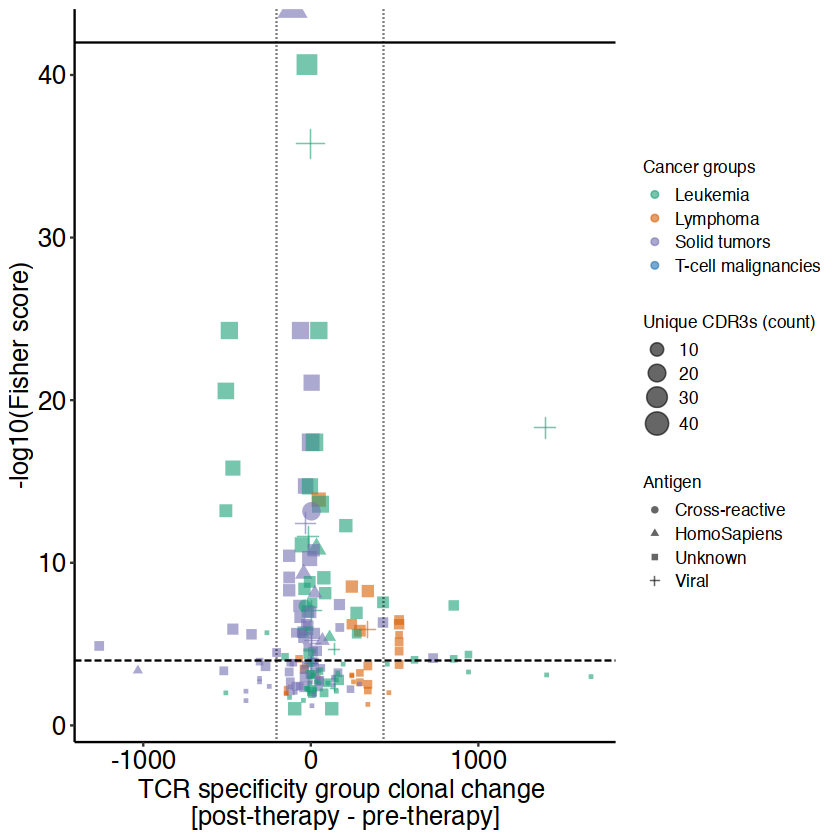

In [383]:
p4

In [384]:
pdf(paste0(plotpath, "p_gliph_fisher_delta.pdf"), width = 7, height = 6)
p4
dev.off()

pdf 
  2

# Backup

### PCA gliph

In [ ]:
head(tmp)

In [ ]:
chp_gliph <- tmp[ grepl("CHP", tmp$Sample), ]

In [ ]:
chp_gliph_sum <- chp_gliph %>% 
  group_by(Sample, pattern) %>% 
  summarise(SumFreq = sum(Freq), .groups = 'drop')

In [ ]:
head(chp_gliph_sum)

In [ ]:
chp_gliph_wide <- tidyr::pivot_wider(chp_gliph_sum[, c("Sample", "pattern", "SumFreq")], names_from = "pattern", values_from = "SumFreq")

In [ ]:
head(chp_gliph_wide)

In [ ]:
chp_gliph_wide <- as.data.frame(chp_gliph_wide)
rownames(chp_gliph_wide) <- chp_gliph_wide$Sample
chp_gliph_wide$Sample <- NULL

In [ ]:
chp_gliph_wide <- as.matrix(chp_gliph_wide)

In [ ]:
head(chp_gliph_wide)

In [ ]:
chp_gliph_wide[is.na(chp_gliph_wide)] <- 0

In [ ]:
head(chp_gliph_wide)

In [ ]:
pbmc <- chp_gliph_wide[grepl("PBMC", rownames(chp_gliph_wide)),]
pbmc <- pbmc[, colSums(pbmc > 0) > 0]

In [ ]:
mypca <- prcomp(pbmc, center = TRUE, scale. = TRUE)

In [ ]:
# plot PCA with factoextra
viz_pca <- fviz_pca_ind(mypca,
    col.ind = as.vector(gsub(":.*", "", rownames(pbmc))),
    # gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
    # remove labels
    label = "none",
    repel = TRUE, addEllipses = FALSE
)

In [ ]:
# scree plot
fviz_eig(mypca)

In [ ]:
viz_pca + coord_cartesian(xlim=c(-2, 10), ylim=c(-2, 10) )

# v1

table patterns, group gliph based on external db, run ancombc for cfdna and pbmc at baseline

In [ ]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

In [ ]:
#remove those samples that we did not have the TCRseq data for
meta_div <- meta_div[!is.na(meta_div$TRB),]

In [ ]:
gliph_out <- readr::read_csv(paste0(h4hpath, "/v4/gliph_output/int_vdj_v4_cluster.csv"), col_names = T) # default gliph reference dataset

In [ ]:
# remove columns starting with HLA
gliph_out <- gliph_out[,!grepl("HLA", colnames(gliph_out))]

In [ ]:
head(gliph_out)

In [ ]:
#  tmp <- gliph_out[gliph_out$number_subject >= 3,]
#  tmp <- tmp[tmp$number_unique_cdr3 >= 3,]
#   tmp <- tmp[tmp$Fisher_score < 0.001,]
# tmp <- tmp[tmp$expansion_score < 0.01,]
# tmp <- tmp[tmp$length_score < 0.002,]

gliph_out_nosingle <- gliph_out[ gliph_out$pattern != "single",]

In [ ]:
dim(gliph_out)
dim(gliph_out_nosingle)

In [ ]:
# only those gliph groups with >= 3 baseline subjects from CHP
chp <- gliph_out_nosingle[ grepl("CHP", gliph_out_nosingle$Sample),]
chp_x01 <- chp[ grepl("X01", chp$Sample),]
chp_x01_sample <- chp_x01[ grepl("cfDNA", chp_x01$Sample),]

In [ ]:
pattern_freq <- as.data.frame(table(chp_x01_sample$pattern) , stringsAsFactors = F)
mypatterns <- pattern_freq$Var1[ pattern_freq$Freq >= 3 ]

In [ ]:
head(chp_x01_sample)

In [ ]:
(mypatterns)

In [ ]:
# subset the original gliph_out_nosingle to mypatterns to keep the external database
gliph_out_nosingle_chppatterns <- gliph_out_nosingle[gliph_out_nosingle$pattern %in% mypatterns,]

In [ ]:
dim(gliph_out_nosingle)
dim(gliph_out_nosingle_chppatterns)

In [ ]:
# get the matrix of GLIPH x samples
pat_type <- as.data.frame.matrix(table(gliph_out_nosingle_chppatterns %>% select(pattern, Sample)))

In [ ]:
head(pat_type)

In [ ]:
pat_type <- pat_type[, grepl("CHP", colnames(pat_type))]

In [ ]:
# make a samplename to match subject:condition of gliph_out
meta_div$samplename <- paste0(meta_div$cancergroup, ":", meta_div$Patient, "_", meta_div$cycle, "-", meta_div$sampletype)
meta_div$samplename <- gsub(" ", "", meta_div$samplename)

In [ ]:
table(meta_div$cancergroup)

In [ ]:
meta_div <- meta_div[ meta_div$cancergroup %in% c("Solid tumors", "Leukemia", "Lymphoma", "T-cell malignancies"),]

In [ ]:
meta_div_sampletype <- meta_div[ meta_div$sampletype == "cfDNA",]

meta_div_sampletype_x01 <- meta_div_sampletype[ meta_div_sampletype$cycle == "X01",]

In [ ]:
table(meta_div_sampletype_x01$cancergroup)

In [ ]:
# subset the matrix to match samples in the metadata
pat_type <- pat_type[, colnames(pat_type) %in% meta_div_sampletype_x01$samplename ]
# match metadata to the matrix
metadata_matched <- meta_div_sampletype_x01[match(colnames(pat_type), meta_div_sampletype_x01$samplename), ]

In [ ]:
dim(metadata_matched)
dim(pat_type)

Make rowData

In [ ]:
gliphdf <- data.frame(gliph = rownames(pat_type))
rownames(gliphdf) <- gliphdf$gliph

In [ ]:
gliph_out_nosingle_chppatterns$subject <- gsub(":.*", "", gliph_out_nosingle_chppatterns$Sample)

In [ ]:
head(gliph_out_nosingle_chppatterns[, c("subject", "Sample")])

In [ ]:
names(table(gliph_out_nosingle_chppatterns$subject[!grepl("CHP", gliph_out_nosingle_chppatterns$Sample)]))

In [ ]:
#rmeove LFS cases
gliph_out_nosingle_chppatterns <- gliph_out_nosingle_chppatterns[!grepl("LFS", gliph_out_nosingle_chppatterns$subject),]

In [ ]:
names(table(gliph_out_nosingle_chppatterns$subject[!grepl("CHP", gliph_out_nosingle_chppatterns$Sample)]))

In [ ]:
for(i in 1:nrow(gliphdf)){

mygliph <- gliph_out_nosingle_chppatterns[gliph_out_nosingle_chppatterns$pattern == gliphdf$gliph[i],]
# add 1 in gliphdf$CMV, if mygliph$subject ciontains CMV
gliphdf$CMV[i] <- ifelse(sum(grepl("CMV", mygliph$subject)) > 0, sum(grepl("CMV", mygliph$subject)), 0)
gliphdf$EBV[i] <- ifelse(sum(grepl("EBV", mygliph$subject)) > 0, sum(grepl("EBV", mygliph$subject)), 0)
gliphdf$HCV[i] <- ifelse(sum(grepl("HCV", mygliph$subject)) > 0, sum(grepl("HCV", mygliph$subject)), 0)
# gliphdf$Flu[i] <- ifelse(sum(grepl("Influenza", mygliph$subject)) > 0, sum(grepl("Influenza", mygliph$subject)), 0)

gliphdf$hs[i] <- ifelse(sum(grepl("HomoSapiens", mygliph$subject)) > 0, sum(grepl("HomoSapiens", mygliph$subject)), 0)
gliphdf$hs[i] <- ifelse(sum(grepl("MDavis", mygliph$subject)) > 0, sum(grepl("MDavis", mygliph$subject)), 0)

gliphdf$HPV[i] <- ifelse(sum(grepl("HPV", mygliph$subject)) > 0, sum(grepl("HPV", mygliph$subject)), 0)
# gliphdf$CEF[i] <- ifelse(sum(grepl("CEF", mygliph$subject)) > 0, sum(grepl("CEF", mygliph$subject)), 0)
gliphdf$TB[i] <- ifelse(sum(grepl("M.tuberculosis", mygliph$subject)) > 0, sum(grepl("M.tuberculosis", mygliph$subject)), 0)
gliphdf$MCPyV[i] <- ifelse(sum(grepl("MCPyV", mygliph$subject)) > 0, sum(grepl("MCPyV", mygliph$subject)), 0)
gliphdf$SP[i] <- ifelse(sum(grepl("S-pneumoniae", mygliph$subject)) > 0, sum(grepl("S-pneumoniae", mygliph$subject)), 0)

# gliphdf$SP[i] <- ifelse(sum(grepl("HTLV-1", mygliph$subject)) > 0, sum(grepl("HTLV-1", mygliph$subject)), 0)
# gliphdf$SP[i] <- ifelse(sum(grepl("DENV", mygliph$subject)) > 0, sum(grepl("DENV", mygliph$subject)), 0)
}

In [ ]:
head(gliphdf)

In [ ]:
gliphdf$Family <- NA

for (i in 1:nrow(gliphdf)) {
    mygliph <- gliph_out_nosingle_chppatterns[gliph_out_nosingle_chppatterns$pattern == gliphdf$gliph[i], ]
    # add CMV to gliphdf$Family, if CMV is in mygliph$subject
    gliphdf$Family[i] <- ifelse(sum(grepl("CMV", mygliph$subject)) > 0, "CMV", "")
    gliphdf$Family[i] <- ifelse(sum(grepl("EBV", mygliph$subject)) > 0, paste0("EBV_", gliphdf$Family[i]), gliphdf$Family[i])
    gliphdf$Family[i] <- ifelse(sum(grepl("HCV", mygliph$subject)) > 0, paste0("HCV_", gliphdf$Family[i]), gliphdf$Family[i])
    # gliphdf$Family[i] <- ifelse(sum(grepl("Influenza", mygliph$subject)) > 0, paste0("Flu_", gliphdf$Family[i]), gliphdf$Family[i])
    gliphdf$Family[i] <- ifelse(sum(grepl("HomoSapiens", mygliph$subject)) > 0, paste0("hs_", gliphdf$Family[i]), gliphdf$Family[i])
    gliphdf$Family[i] <- ifelse(sum(grepl("HPV", mygliph$subject)) > 0, paste0("HPV_", gliphdf$Family[i]), gliphdf$Family[i])
    # gliphdf$Family[i] <- ifelse(sum(grepl("CEF", mygliph$subject)) > 0, paste0("CEF_", gliphdf$Family[i]), gliphdf$Family[i])
    gliphdf$Family[i] <- ifelse(sum(grepl("M.tuberculosis", mygliph$subject)) > 0, paste0("TB_", gliphdf$Family[i]), gliphdf$Family[i])
    gliphdf$Family[i] <- ifelse(sum(grepl("MCPyV", mygliph$subject)) > 0, paste0("MCPyV_", gliphdf$Family[i]), gliphdf$Family[i])
    gliphdf$Family[i] <- ifelse(sum(grepl("MDavis", mygliph$subject)) > 0, paste0("hs_", gliphdf$Family[i]), gliphdf$Family[i])
    gliphdf$Family[i] <- ifelse(sum(grepl("S-pneumoniae", mygliph$subject)) > 0, paste0("SP_", gliphdf$Family[i]), gliphdf$Family[i])
    # gliphdf$Family[i] <- ifelse(sum(grepl("DENV", mygliph$subject)) > 0, paste0("DENV_", gliphdf$Family[i]), gliphdf$Family[i])
    # gliphdf$Family[i] <- ifelse(sum(grepl("HTLV", mygliph$subject)) > 0, paste0("HTLV_", gliphdf$Family[i]), gliphdf$Family[i])

}

In [ ]:
head(gliphdf)

In [ ]:
for (i in 1:nrow(gliphdf)) {
    mygliph <- gliph_out_nosingle_chppatterns[gliph_out_nosingle_chppatterns$pattern == gliphdf$gliph[i], ]
    gliphdf$n_cdr3[i] <- nrow(mygliph)
}

In [ ]:
head(gliphdf[ gliphdf$Family != "",],10)

In [ ]:
gliphdf$Family[gliphdf$Family == "" ] <- "NK"

In [ ]:
levels(as.factor(gliphdf$Family))

In [ ]:
# cleanup
gliphdf$Family <- gsub("_$", "", gliphdf$Family)
gliphdf$Family[ gliphdf$Family == "hs_hs"] <- "hs"
gliphdf$Family <- gsub("hs_hs", "hs", gliphdf$Family)

In [ ]:
levels(as.factor(gliphdf$Family))

In [ ]:
# species = gliph, genus = original annotations, family = grouped annotations
gliphdf$Genus <- gliphdf$Family

In [ ]:
gliphdf$Family[grepl("hs_", gliphdf$Family)] <- "cross-reactive"
gliphdf$Family[grepl("_hs", gliphdf$Family)] <- "cross-reactive"
gliphdf$Family[ gliphdf$Family %in% c("CMV", "EBV", "HPV")] <- "Viral"

In [ ]:
levels(as.factor(gliphdf$Genus))
levels(as.factor(gliphdf$Family))

Create TreeSummarizedExperiment to input to ANCOMBC

In [ ]:
table(metadata_matched$cancergroup)

In [ ]:
rownames(metadata_matched) <- metadata_matched$samplename

In [ ]:
head(metadata_matched)

In [ ]:
table(gliphdf$Family)

In [ ]:
head(gliphdf)

In [ ]:
tse_X01 <- TreeSummarizedExperiment(
    assays = list(Count = as.matrix(pat_type)),
    rowData = gliphdf,
    colData = metadata_matched
)

In [ ]:
table(metadata_matched$cancergroup)

In [ ]:
# tse_X01 <- onetest_tse[, colnames(onetest_tse)[grepl("X01", colnames(onetest_tse)) ] ]

# tse_X01 <- tse_X01[, colnames(tse_X01)[!grepl("T-cellmalignancies", colnames(tse_X01)) ] ]

In [ ]:
nks <- gliphdf$gliph[ gliphdf$Family %in% c("NK", "TB")]

In [ ]:
length(nks)

In [ ]:
tse_X01 <- tse_X01[ !rownames(tse_X01) %in% nks, ]

In [ ]:
tse_X01

In [ ]:
table(rowData(tse_X01)$Family)

In [ ]:
# colData(tse_X01)$cancergroup <- as.character(colData(tse_X01)$cancergroup)

# colData(tse_X01) <- colData(tse_X01)[ colData(tse_X01)$cancergroup != "T-cell malignancies"]

In [ ]:
colData(tse_X01)$cancergroup <- factor(colData(tse_X01)$cancergroup, levels = c("Leukemia", "Lymphoma", "Solid tumors"))

In [ ]:
table(rowData(tse_X01)$gliph)

In [ ]:
# readr::write_rds(onetest_tse, "/Users/anabbi/Desktop/H4H/INTERCEPT/analysis/GLIPH/ancombc/int_gliph_tse_X01_pbmc.rds")

In [ ]:
# rowData(tse_X01)$Family <- rowData(tse_X01)$gliph

In [ ]:
set.seed(111)

In [ ]:
out <- ancombc2(
    data = tse_X01, assay_name = "Count",
    tax_level = NULL, 
    fix_formula = "cancergroup", rand_formula = NULL,#"(1|Patient)",
    p_adj_method = "fdr", 
    pseudo = 0, pseudo_sens = TRUE, # add pseudocounts
    prv_cut = 0.01, # prevalence cutoff
    lib_cut = 0, # library size cutoff
    s0_perc = 0.05, 
    group = "cancergroup", 
    struc_zero = FALSE, 
    neg_lb = FALSE, # check this again
    alpha = 0.05, 
    n_cl = 10, # number of nodes
    verbose = TRUE,
    global = TRUE, pairwise = TRUE, dunnet = TRUE, trend = FALSE, # test types
    iter_control = list(tol = 1e-2, max_iter = 20, verbose = TRUE),
    em_control = list(tol = 1e-5, max_iter = 100),
    lme_control = lme4::lmerControl(),
    mdfdr_control = list(fwer_ctrl_method = "fdr", B = 100)
)


In [ ]:
# out <- readr::read_rds("/Users/anabbi/Desktop/H4H/INTERCEPT/analysis/GLIPH/ancombc/int_gliph_tse_X01_pbmc_res.rds")

In [ ]:
myres <- out$res_pair

In [ ]:
myres

In [ ]:
out$res

# v2

table patterns, group gliph based on external db, run ancombc for cfdna and pbmc comparing baseline to post-chemo in each cancergroup

In [ ]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

In [ ]:
#remove those samples that we did not have the TCRseq data for
meta_div <- meta_div[!is.na(meta_div$TRB),]

In [ ]:
gliph_out <- readr::read_csv(paste0(h4hpath, "/v4/gliph_output/int_vdj_v4_cluster.csv"), col_names = T) # default gliph reference dataset

In [ ]:
# remove columns starting with HLA
gliph_out <- gliph_out[,!grepl("HLA", colnames(gliph_out))]

In [ ]:
head(gliph_out)

In [ ]:
#  tmp <- gliph_out[gliph_out$number_subject >= 3,]
#  tmp <- tmp[tmp$number_unique_cdr3 >= 3,]
#   tmp <- tmp[tmp$Fisher_score < 0.001,]
# tmp <- tmp[tmp$expansion_score < 0.01,]
# tmp <- tmp[tmp$length_score < 0.002,]

gliph_out_nosingle <- gliph_out[ gliph_out$pattern != "single",]

In [ ]:
dim(gliph_out)
dim(gliph_out_nosingle)

In [ ]:
# only those gliph groups with >= 3 subjects from CHP
chp <- gliph_out_nosingle[ grepl("Leukemia", gliph_out_nosingle$Sample),]
chp_sample <- chp[ grepl("cfDNA", chp$Sample),]

In [ ]:
# pattern_pre_freq <- as.data.frame(table(chp_pre$pattern) , stringsAsFactors = F)
# pattern_post_freq <- as.data.frame(table(chp_post$pattern) , stringsAsFactors = F)

# myprepatterns <- pattern_pre_freq$Var1[ pattern_pre_freq$Freq >= 3 ]
# mypostpatterns <- pattern_post_freq$Var1[ pattern_post_freq$Freq >= 3 ]

In [ ]:
# length(myprepatterns)
# length(mypostpatterns)

In [ ]:
# mypatterns <- intersect(myprepatterns, mypostpatterns)

In [ ]:
# subset the original gliph_out_nosingle to mypatterns to keep the external database
# gliph_out_nosingle_chppatterns <- gliph_out_nosingle#[gliph_out_nosingle$pattern %in% mypatterns,]

In [ ]:
dim(gliph_out_nosingle)
# dim(gliph_out_nosingle_chppatterns)

In [ ]:
# get the matrix of GLIPH x samples
pat_type <- as.data.frame.matrix(table(gliph_out_nosingle %>% select(pattern, Sample)))

In [ ]:
head(pat_type)

In [ ]:
pat_type <- pat_type[, grepl("CHP", colnames(pat_type))]

In [ ]:
# make a samplename to match subject:condition of gliph_out
meta_div$samplename <- paste0(meta_div$cancergroup, ":", meta_div$Patient, "_", meta_div$cycle, "-", meta_div$sampletype)
meta_div$samplename <- gsub(" ", "", meta_div$samplename)

In [ ]:
table(meta_div$cancergroup)

In [ ]:
meta_div <- meta_div[ meta_div$cancergroup %in% c("Solid tumors", "Leukemia", "Lymphoma", "T-cell malignancies"),]

In [ ]:
meta_div_sampletype <- meta_div[ meta_div$sampletype == "cfDNA",]

meta_div_sampletype_cancer <- meta_div_sampletype[ meta_div_sampletype$cancergroup == "Leukemia",]

In [ ]:
table(meta_div_sampletype_cancer$cycle)

In [ ]:
myfreq <- as.data.frame(table(meta_div_sampletype_cancer$Patient) )

In [ ]:
mypts <- myfreq$Var1[ myfreq$Freq > 1]

In [ ]:
meta_div_sampletype_cancer <- meta_div_sampletype_cancer[ meta_div_sampletype_cancer$Patient %in% mypts,]

In [ ]:
# subset the matrix to match samples in the metadata
pat_type <- pat_type[ rowSums(pat_type) > 2, colnames(pat_type) %in% meta_div_sampletype_cancer$samplename ]
# match metadata to the matrix
metadata_matched <- meta_div_sampletype_cancer[match(colnames(pat_type), meta_div_sampletype_cancer$samplename), ]

In [ ]:
dim(metadata_matched)
dim(pat_type)

Make rowData

In [ ]:
gliphdf <- data.frame(gliph = rownames(pat_type))
rownames(gliphdf) <- gliphdf$gliph

In [ ]:
gliph_out_nosingle$subject <- gsub(":.*", "", gliph_out_nosingle$Sample)

In [ ]:
head(gliph_out_nosingle[, c("subject", "Sample")])

In [ ]:
names(table(gliph_out_nosingle$subject[!grepl("CHP", gliph_out_nosingle$Sample)]))

In [ ]:
#rmeove LFS cases
gliph_out_nosingle <- gliph_out_nosingle[!grepl("LFS", gliph_out_nosingle$subject),]

In [ ]:
names(table(gliph_out_nosingle$subject[!grepl("CHP", gliph_out_nosingle$Sample)]))

In [ ]:
for(i in 1:nrow(gliphdf)){

mygliph <- gliph_out_nosingle[gliph_out_nosingle$pattern == gliphdf$gliph[i],]
# add 1 in gliphdf$CMV, if mygliph$subject ciontains CMV
gliphdf$CMV[i] <- ifelse(sum(grepl("CMV", mygliph$subject)) > 0, sum(grepl("CMV", mygliph$subject)), 0)
gliphdf$EBV[i] <- ifelse(sum(grepl("EBV", mygliph$subject)) > 0, sum(grepl("EBV", mygliph$subject)), 0)
gliphdf$HCV[i] <- ifelse(sum(grepl("HCV", mygliph$subject)) > 0, sum(grepl("HCV", mygliph$subject)), 0)
gliphdf$Flu[i] <- ifelse(sum(grepl("Influenza", mygliph$subject)) > 0, sum(grepl("Influenza", mygliph$subject)), 0)

gliphdf$hs[i] <- ifelse(sum(grepl("HomoSapiens", mygliph$subject)) > 0, sum(grepl("HomoSapiens", mygliph$subject)), 0)
gliphdf$hs[i] <- ifelse(sum(grepl("MDavis", mygliph$subject)) > 0, sum(grepl("MDavis", mygliph$subject)), 0)

gliphdf$HPV[i] <- ifelse(sum(grepl("HPV", mygliph$subject)) > 0, sum(grepl("HPV", mygliph$subject)), 0)
gliphdf$CEF[i] <- ifelse(sum(grepl("CEF", mygliph$subject)) > 0, sum(grepl("CEF", mygliph$subject)), 0)
gliphdf$TB[i] <- ifelse(sum(grepl("M.tuberculosis", mygliph$subject)) > 0, sum(grepl("M.tuberculosis", mygliph$subject)), 0)
gliphdf$MCPyV[i] <- ifelse(sum(grepl("MCPyV", mygliph$subject)) > 0, sum(grepl("MCPyV", mygliph$subject)), 0)
gliphdf$SP[i] <- ifelse(sum(grepl("S-pneumoniae", mygliph$subject)) > 0, sum(grepl("S-pneumoniae", mygliph$subject)), 0)

gliphdf$SP[i] <- ifelse(sum(grepl("HTLV-1", mygliph$subject)) > 0, sum(grepl("HTLV-1", mygliph$subject)), 0)
gliphdf$SP[i] <- ifelse(sum(grepl("DENV", mygliph$subject)) > 0, sum(grepl("DENV", mygliph$subject)), 0)
}

In [ ]:
head(gliphdf)

In [ ]:
gliphdf$Family <- NA

for (i in 1:nrow(gliphdf)) {
    mygliph <- gliph_out_nosingle[gliph_out_nosingle$pattern == gliphdf$gliph[i], ]
    # add CMV to gliphdf$Family, if CMV is in mygliph$subject
    gliphdf$Family[i] <- ifelse(sum(grepl("CMV", mygliph$subject)) > 0, "CMV", "")
    gliphdf$Family[i] <- ifelse(sum(grepl("EBV", mygliph$subject)) > 0, paste0("EBV_", gliphdf$Family[i]), gliphdf$Family[i])
    gliphdf$Family[i] <- ifelse(sum(grepl("HCV", mygliph$subject)) > 0, paste0("HCV_", gliphdf$Family[i]), gliphdf$Family[i])
    gliphdf$Family[i] <- ifelse(sum(grepl("Influenza", mygliph$subject)) > 0, paste0("Flu_", gliphdf$Family[i]), gliphdf$Family[i])
    gliphdf$Family[i] <- ifelse(sum(grepl("HomoSapiens", mygliph$subject)) > 0, paste0("hs_", gliphdf$Family[i]), gliphdf$Family[i])
    gliphdf$Family[i] <- ifelse(sum(grepl("HPV", mygliph$subject)) > 0, paste0("HPV_", gliphdf$Family[i]), gliphdf$Family[i])
    gliphdf$Family[i] <- ifelse(sum(grepl("CEF", mygliph$subject)) > 0, paste0("CEF_", gliphdf$Family[i]), gliphdf$Family[i])
    gliphdf$Family[i] <- ifelse(sum(grepl("M.tuberculosis", mygliph$subject)) > 0, paste0("TB_", gliphdf$Family[i]), gliphdf$Family[i])
    gliphdf$Family[i] <- ifelse(sum(grepl("MCPyV", mygliph$subject)) > 0, paste0("MCPyV_", gliphdf$Family[i]), gliphdf$Family[i])
    gliphdf$Family[i] <- ifelse(sum(grepl("MDavis", mygliph$subject)) > 0, paste0("hs_", gliphdf$Family[i]), gliphdf$Family[i])
    gliphdf$Family[i] <- ifelse(sum(grepl("S-pneumoniae", mygliph$subject)) > 0, paste0("SP_", gliphdf$Family[i]), gliphdf$Family[i])
    gliphdf$Family[i] <- ifelse(sum(grepl("DENV", mygliph$subject)) > 0, paste0("DENV_", gliphdf$Family[i]), gliphdf$Family[i])
    gliphdf$Family[i] <- ifelse(sum(grepl("HTLV", mygliph$subject)) > 0, paste0("HTLV_", gliphdf$Family[i]), gliphdf$Family[i])

}

In [ ]:
head(gliphdf)

In [ ]:
for (i in 1:nrow(gliphdf)) {
    mygliph <- gliph_out_nosingle[gliph_out_nosingle$pattern == gliphdf$gliph[i], ]
    gliphdf$n_cdr3[i] <- nrow(mygliph)
}

In [ ]:
head(gliphdf[ gliphdf$Family != "",],10)

In [ ]:
gliphdf$Family[gliphdf$Family == "" ] <- "NK"

In [ ]:
levels(as.factor(gliphdf$Family))

In [ ]:
# cleanup
gliphdf$Family <- gsub("_$", "", gliphdf$Family)
gliphdf$Family[ gliphdf$Family == "hs_hs"] <- "hs"
gliphdf$Family <- gsub("hs_hs", "hs", gliphdf$Family)

In [ ]:
levels(as.factor(gliphdf$Family))

In [ ]:
# species = gliph, genus = original annotations, family = grouped annotations
gliphdf$Genus <- gliphdf$Family

In [ ]:
gliphdf$Family[grepl("hs_", gliphdf$Family)] <- "cross-reactive"
gliphdf$Family[grepl("_hs", gliphdf$Family)] <- "cross-reactive"
gliphdf$Family[ gliphdf$Family %in% c("CMV", "EBV", "HPV", "HCV", "MCPyV", "HTLV", "Flu", "DENV", "CEF")] <- "Viral"
gliphdf$Family[grepl("_", gliphdf$Family)] <- "Viral"

In [ ]:
levels(as.factor(gliphdf$Genus))
levels(as.factor(gliphdf$Family))

Create TreeSummarizedExperiment to input to ANCOMBC

In [ ]:
table(metadata_matched$cancergroup)

In [ ]:
rownames(metadata_matched) <- metadata_matched$samplename

In [ ]:
head(metadata_matched)

In [ ]:
table(gliphdf$Family)

In [ ]:
head(gliphdf)

In [ ]:
metadata_matched$mygroup <- NA
metadata_matched$mygroup[metadata_matched$cycle == "X01"] <- "Pre"
metadata_matched$mygroup[metadata_matched$cycle != "X01"] <- "Post"

In [ ]:
table(metadata_matched$mygroup)

In [ ]:
tse_cycle <- TreeSummarizedExperiment(
    assays = list(Count = as.matrix(pat_type)),
    rowData = gliphdf,
    colData = metadata_matched
)

In [ ]:
tse_cycle

In [ ]:
table(metadata_matched$mygroup)

In [ ]:
# tse_X01 <- onetest_tse[, colnames(onetest_tse)[grepl("X01", colnames(onetest_tse)) ] ]

# tse_X01 <- tse_X01[, colnames(tse_X01)[!grepl("T-cellmalignancies", colnames(tse_X01)) ] ]

In [ ]:
nks <- gliphdf$gliph[ gliphdf$Family %in% c("NK")]

In [ ]:
length(nks)

In [ ]:
tse_cycle <- tse_cycle[ !rownames(tse_cycle) %in% nks, ]

In [ ]:
tse_cycle

In [ ]:
table(colData(tse_cycle)$mygroup, useNA = "ifany")

In [ ]:
head(rowSums(assay(tse_cycle)))

In [ ]:
# readr::write_rds(tse_cycle, "/Users/anabbi/Desktop/H4H/INTERCEPT/analysis/GLIPH/ancombc/int_gliph_tse_leu_pre_post_cfdna.rds")

In [ ]:
# rowData(tse_X01)$Family <- rowData(tse_X01)$gliph

In [ ]:
set.seed(111)

In [ ]:
out <- ancombc2(
    data = tse_cycle, assay_name = "counts",
    tax_level = "Family", 
    fix_formula = "mygroup", rand_formula = "(1|Patient)",
    p_adj_method = "fdr", 
    pseudo = 0, pseudo_sens = TRUE, # add pseudocounts
    prv_cut = 0.02, # prevalence cutoff
    lib_cut = 0, # library size cutoff
    s0_perc = 0.05, 
    group = "mygroup", 
    struc_zero = FALSE, 
    neg_lb = FALSE, # check this again
    alpha = 0.05, 
    n_cl = 10, # number of nodes
    verbose = TRUE,
    global = FALSE, pairwise = FALSE, dunnet = FALSE, trend = FALSE, # test types
    iter_control = list(tol = 1e-2, max_iter = 20, verbose = TRUE),
    em_control = list(tol = 1e-5, max_iter = 100),
    lme_control = lme4::lmerControl(),
    mdfdr_control = list(fwer_ctrl_method = "fdr", B = 100)
)


In [ ]:
out <- readr::read_rds("/Users/anabbi/Desktop/H4H/INTERCEPT/analysis/GLIPH/ancombc/int_gliph_leu_pre_post_cfdna_taxares.rds")

In [ ]:
out$res

# v3
include clonecounts in gliph groups

In [ ]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

In [ ]:
#remove those samples that we did not have the TCRseq data for
meta_div <- meta_div[!is.na(meta_div$TRB),]

In [ ]:
gliph_out <- readr::read_csv(paste0(h4hpath, "/v4/gliph_output/int_vdj_v4_cluster.csv"), col_names = T) # default gliph reference dataset

In [ ]:
# remove columns starting with HLA
gliph_out <- gliph_out[,!grepl("HLA", colnames(gliph_out))]

In [ ]:
head(gliph_out)

In [ ]:
#  tmp <- gliph_out[gliph_out$number_subject >= 3,]
#  tmp <- tmp[tmp$number_unique_cdr3 >= 3,]
#   tmp <- tmp[tmp$Fisher_score < 0.001,]
# tmp <- tmp[tmp$expansion_score < 0.01,]
# tmp <- tmp[tmp$length_score < 0.002,]

gliph_out_nosingle <- gliph_out[ gliph_out$pattern != "single",]

In [ ]:
dim(gliph_out)
dim(gliph_out_nosingle)

In [ ]:
# only those gliph groups with >= 3 baseline subjects from CHP
chp <- gliph_out_nosingle[ grepl("CHP", gliph_out_nosingle$Sample),]
chp_x01 <- chp[ grepl("X01", chp$Sample),]
chp_x01_sample <- chp_x01[ grepl("PBMC", chp_x01$Sample),]

In [ ]:
pattern_freq <- as.data.frame(table(chp_x01_sample$pattern) , stringsAsFactors = F)
mypatterns <- pattern_freq$Var1[ pattern_freq$Freq >= 3 ]

In [ ]:
# pattern_pre_freq <- as.data.frame(table(chp_pre$pattern) , stringsAsFactors = F)
# pattern_post_freq <- as.data.frame(table(chp_post$pattern) , stringsAsFactors = F)

# myprepatterns <- pattern_pre_freq$Var1[ pattern_pre_freq$Freq >= 3 ]
# mypostpatterns <- pattern_post_freq$Var1[ pattern_post_freq$Freq >= 3 ]

In [ ]:
# length(myprepatterns)
# length(mypostpatterns)

In [ ]:
# mypatterns <- intersect(myprepatterns, mypostpatterns)

In [ ]:
# subset the original gliph_out_nosingle to mypatterns to keep the external database
gliph_out_nosingle_chppatterns <- gliph_out_nosingle[gliph_out_nosingle$pattern %in% mypatterns,]

In [ ]:
dim(gliph_out_nosingle)
dim(gliph_out_nosingle_chppatterns)

In [ ]:
head(gliph_out_nosingle_chppatterns)

In [ ]:
pat_type <- gliph_out_nosingle_chppatterns[, c("pattern", "Sample", "Freq")] %>%
  tidyr::pivot_wider(names_from = Sample, values_from = Freq, values_fn = sum, values_fill = 0)

In [ ]:
pat_type <- as.data.frame(pat_type)
rownames(pat_type) <- pat_type$pattern
pat_type$pattern <- NULL

In [ ]:
head(pat_type)

In [ ]:
# # get the matrix of GLIPH x samples
# pat_type <- as.data.frame.matrix(table(gliph_out_nosingle_chppatterns %>% select(pattern, Sample)))

In [ ]:
pat_type <- pat_type[, grepl("CHP", colnames(pat_type))]

In [ ]:
# make a samplename to match subject:condition of gliph_out
meta_div$samplename <- paste0(meta_div$cancergroup, ":", meta_div$Patient, "_", meta_div$cycle, "-", meta_div$sampletype)
meta_div$samplename <- gsub(" ", "", meta_div$samplename)

In [ ]:
table(meta_div$cancergroup)

In [ ]:
meta_div <- meta_div[ meta_div$cancergroup %in% c("Solid tumors", "Leukemia", "Lymphoma"),]

In [ ]:
meta_div_sampletype <- meta_div[ meta_div$sampletype == "PBMC",]

meta_div_sampletype_x01 <- meta_div_sampletype[ meta_div_sampletype$cycle == "X01",]

In [ ]:
table(meta_div_sampletype_x01$cancergroup)

In [ ]:
myfreq <- as.data.frame(table(meta_div_sampletype_x01$Patient) )

In [ ]:
# mypts <- myfreq$Var1[ myfreq$Freq > 1]

In [ ]:
# meta_div_sampletype_cancer <- meta_div_sampletype_cancer[ meta_div_sampletype_cancer$Patient %in% mypts,]

In [ ]:
# subset the matrix to match samples in the metadata
pat_type <- pat_type[ , colnames(pat_type) %in% meta_div_sampletype_x01$samplename ]
# match metadata to the matrix
metadata_matched <- meta_div_sampletype_x01[match(colnames(pat_type), meta_div_sampletype_x01$samplename), ]

In [ ]:
dim(metadata_matched)
dim(pat_type)

Make rowData

In [ ]:
head(pat_type)

In [ ]:
gliphdf <- data.frame(gliph = rownames(pat_type))
rownames(gliphdf) <- gliphdf$gliph

In [ ]:
head(gliphdf)

In [ ]:
gliph_out_nosingle$subject <- gsub(":.*", "", gliph_out_nosingle$Sample)

In [ ]:
head(gliph_out_nosingle[, c("subject", "Sample")])

In [ ]:
names(table(gliph_out_nosingle$subject[!grepl("CHP", gliph_out_nosingle$Sample)]))

In [ ]:
#rmeove LFS cases
gliph_out_nosingle <- gliph_out_nosingle[!grepl("LFS", gliph_out_nosingle$subject),]

In [ ]:
names(table(gliph_out_nosingle$subject[!grepl("CHP", gliph_out_nosingle$Sample)]))

In [ ]:
for(i in 1:nrow(gliphdf)){

mygliph <- gliph_out_nosingle[gliph_out_nosingle$pattern == gliphdf$gliph[i],]
# add 1 in gliphdf$CMV, if mygliph$subject ciontains CMV
gliphdf$CMV[i] <- ifelse(sum(grepl("CMV", mygliph$subject)) > 0, sum(grepl("CMV", mygliph$subject)), 0)
gliphdf$EBV[i] <- ifelse(sum(grepl("EBV", mygliph$subject)) > 0, sum(grepl("EBV", mygliph$subject)), 0)
gliphdf$HCV[i] <- ifelse(sum(grepl("HCV", mygliph$subject)) > 0, sum(grepl("HCV", mygliph$subject)), 0)
gliphdf$Flu[i] <- ifelse(sum(grepl("Influenza", mygliph$subject)) > 0, sum(grepl("Influenza", mygliph$subject)), 0)

gliphdf$hs[i] <- ifelse(sum(grepl("HomoSapiens", mygliph$subject)) > 0, sum(grepl("HomoSapiens", mygliph$subject)), 0)
gliphdf$hs[i] <- ifelse(sum(grepl("MDavis", mygliph$subject)) > 0, sum(grepl("MDavis", mygliph$subject)), 0)

gliphdf$HPV[i] <- ifelse(sum(grepl("HPV", mygliph$subject)) > 0, sum(grepl("HPV", mygliph$subject)), 0)
gliphdf$CEF[i] <- ifelse(sum(grepl("CEF", mygliph$subject)) > 0, sum(grepl("CEF", mygliph$subject)), 0)
gliphdf$TB[i] <- ifelse(sum(grepl("M.tuberculosis", mygliph$subject)) > 0, sum(grepl("M.tuberculosis", mygliph$subject)), 0)
gliphdf$MCPyV[i] <- ifelse(sum(grepl("MCPyV", mygliph$subject)) > 0, sum(grepl("MCPyV", mygliph$subject)), 0)
gliphdf$SP[i] <- ifelse(sum(grepl("S-pneumoniae", mygliph$subject)) > 0, sum(grepl("S-pneumoniae", mygliph$subject)), 0)

gliphdf$HTLV[i] <- ifelse(sum(grepl("HTLV-1", mygliph$subject)) > 0, sum(grepl("HTLV-1", mygliph$subject)), 0)
gliphdf$DENV[i] <- ifelse(sum(grepl("DENV", mygliph$subject)) > 0, sum(grepl("DENV", mygliph$subject)), 0)
}

In [ ]:
head(gliphdf)

In [ ]:
gliphdf$Family <- NA

for (i in 1:nrow(gliphdf)) {
    mygliph <- gliph_out_nosingle[gliph_out_nosingle$pattern == gliphdf$gliph[i], ]
    # add CMV to gliphdf$Family, if CMV is in mygliph$subject
    gliphdf$Family[i] <- ifelse(sum(grepl("CMV", mygliph$subject)) > 0, "CMV", "")
    gliphdf$Family[i] <- ifelse(sum(grepl("EBV", mygliph$subject)) > 0, paste0("EBV_", gliphdf$Family[i]), gliphdf$Family[i])
    gliphdf$Family[i] <- ifelse(sum(grepl("HCV", mygliph$subject)) > 0, paste0("HCV_", gliphdf$Family[i]), gliphdf$Family[i])
    gliphdf$Family[i] <- ifelse(sum(grepl("Influenza", mygliph$subject)) > 0, paste0("Flu_", gliphdf$Family[i]), gliphdf$Family[i])
    gliphdf$Family[i] <- ifelse(sum(grepl("HomoSapiens", mygliph$subject)) > 0, paste0("hs_", gliphdf$Family[i]), gliphdf$Family[i])
    gliphdf$Family[i] <- ifelse(sum(grepl("HPV", mygliph$subject)) > 0, paste0("HPV_", gliphdf$Family[i]), gliphdf$Family[i])
    gliphdf$Family[i] <- ifelse(sum(grepl("CEF", mygliph$subject)) > 0, paste0("CEF_", gliphdf$Family[i]), gliphdf$Family[i])
    gliphdf$Family[i] <- ifelse(sum(grepl("M.tuberculosis", mygliph$subject)) > 0, paste0("TB_", gliphdf$Family[i]), gliphdf$Family[i])
    gliphdf$Family[i] <- ifelse(sum(grepl("MCPyV", mygliph$subject)) > 0, paste0("MCPyV_", gliphdf$Family[i]), gliphdf$Family[i])
    gliphdf$Family[i] <- ifelse(sum(grepl("MDavis", mygliph$subject)) > 0, paste0("hs_", gliphdf$Family[i]), gliphdf$Family[i])
    gliphdf$Family[i] <- ifelse(sum(grepl("S-pneumoniae", mygliph$subject)) > 0, paste0("SP_", gliphdf$Family[i]), gliphdf$Family[i])
    gliphdf$Family[i] <- ifelse(sum(grepl("DENV", mygliph$subject)) > 0, paste0("DENV_", gliphdf$Family[i]), gliphdf$Family[i])
    gliphdf$Family[i] <- ifelse(sum(grepl("HTLV", mygliph$subject)) > 0, paste0("HTLV_", gliphdf$Family[i]), gliphdf$Family[i])

}

In [ ]:
head(gliphdf)

In [ ]:
for (i in 1:nrow(gliphdf)) {
    mygliph <- gliph_out_nosingle[gliph_out_nosingle$pattern == gliphdf$gliph[i], ]
    gliphdf$n_cdr3[i] <- nrow(mygliph)
}

In [ ]:
head(gliphdf[ gliphdf$Family != "",],10)

In [ ]:
gliphdf$Family[gliphdf$Family == "" ] <- "NK"

In [ ]:
levels(as.factor(gliphdf$Family))

In [ ]:
# cleanup
gliphdf$Family <- gsub("_$", "", gliphdf$Family)
gliphdf$Family[ gliphdf$Family == "hs_hs"] <- "hs"
gliphdf$Family <- gsub("hs_hs", "hs", gliphdf$Family)

In [ ]:
levels(as.factor(gliphdf$Family))

In [ ]:
# species = gliph, genus = original annotations, family = grouped annotations
gliphdf$Genus <- gliphdf$Family

In [ ]:
gliphdf$Family[grepl("hs_", gliphdf$Family)] <- "cross-reactive"
gliphdf$Family[grepl("_hs", gliphdf$Family)] <- "cross-reactive"
gliphdf$Family[ gliphdf$Family %in% c("CMV", "EBV", "HPV", "HCV", "MCPyV", "HTLV", "Flu", "DENV", "CEF")] <- "Viral"
gliphdf$Family[grepl("_", gliphdf$Family)] <- "Viral"

In [ ]:
levels(as.factor(gliphdf$Genus))
levels(as.factor(gliphdf$Family))

Create TreeSummarizedExperiment to input to ANCOMBC

In [ ]:
table(metadata_matched$cancergroup)

In [ ]:
rownames(metadata_matched) <- metadata_matched$samplename

In [ ]:
head(metadata_matched)

In [ ]:
table(gliphdf$Family)

In [ ]:
head(gliphdf)

In [ ]:
# metadata_matched$mygroup <- NA
# metadata_matched$mygroup[metadata_matched$cycle == "X01"] <- "Pre"
# metadata_matched$mygroup[metadata_matched$cycle != "X01"] <- "Post"

In [ ]:
# table(metadata_matched$mygroup)

In [ ]:
pat_type <- as.matrix(pat_type) 

In [ ]:
tse_cycle <- TreeSummarizedExperiment(
    assays = list(Count = as.matrix(pat_type)),
    rowData = gliphdf,
    colData = metadata_matched
)

In [ ]:
tse_cycle

In [ ]:
# table(metadata_matched$mygroup)

In [ ]:
# tse_X01 <- onetest_tse[, colnames(onetest_tse)[grepl("X01", colnames(onetest_tse)) ] ]

# tse_X01 <- tse_X01[, colnames(tse_X01)[!grepl("T-cellmalignancies", colnames(tse_X01)) ] ]

In [ ]:
# nks <- gliphdf$gliph[ gliphdf$Family %in% c("NK")]

In [ ]:
# length(nks)

In [ ]:
# tse_cycle <- tse_cycle[ !rownames(tse_cycle) %in% nks, ]

In [ ]:
tse_cycle

In [ ]:
# table(colData(tse_cycle)$mygroup, useNA = "ifany")

In [ ]:
head(rowSums(assay(tse_cycle)))

In [ ]:
# readr::write_rds(tse_cycle, "/Users/anabbi/Desktop/H4H/INTERCEPT/analysis/GLIPH/ancombc/int_gliph_tse_leu_pre_post_cfdna.rds")

In [ ]:
# rowData(tse_cycle)$Family <- rowData(tse_cycle)$gliph

In [ ]:
set.seed(111)

In [ ]:
out <- ancombc2(
    data = tse_cycle, assay_name = "Count",
    tax_level = "Genus", 
    fix_formula = "cancergroup", rand_formula = NULL,
    p_adj_method = "fdr", 
    pseudo = 0, pseudo_sens = TRUE, # add pseudocounts
    prv_cut = 0.02, # prevalence cutoff
    lib_cut = 0, # library size cutoff
    s0_perc = 0.05, 
    group = "cancergroup", 
    struc_zero = FALSE, 
    neg_lb = FALSE, # check this again
    alpha = 0.05, 
    n_cl = 1, # number of nodes
    verbose = TRUE,
    global = FALSE, pairwise = FALSE, dunnet = FALSE, trend = FALSE, # test types
    iter_control = list(tol = 1e-2, max_iter = 20, verbose = TRUE),
    em_control = list(tol = 1e-5, max_iter = 100),
    lme_control = lme4::lmerControl(),
    mdfdr_control = list(fwer_ctrl_method = "fdr", B = 100)
)


In [ ]:
# out <- readr::read_rds("/Users/anabbi/Desktop/H4H/INTERCEPT/analysis/GLIPH/ancombc/int_gliph_leu_pre_post_cfdna_taxares.rds")

In [ ]:
out$res

# Backup

In [ ]:
discovery_metadata <- readr::read_rds(file = paste0(datapath, "discovery_metadata_01.rds"))
discovery_metadata$disease[ is.na(discovery_metadata$disease)] <- "Emerson_unknown"

In [ ]:
dim(discovery_metadata)

In [ ]:
table(discovery_metadata$disease)

In [ ]:
# remove non normal non cancer samples
discovery_metadata <- discovery_metadata[!discovery_metadata$disease %in%
    c(
        "KD", "MAS", "LFS", "Emerson_unknown",
        "MIS-C SARSCoV2Neg", "sJIA"
    ), ]


In [ ]:
table(discovery_metadata$disease)

In [ ]:
# make a new variable for the disease
# Group Leukemia, Lymphoma and Solid together as Cancer
discovery_metadata$disease_group <- discovery_metadata$disease

discovery_metadata$disease_group[discovery_metadata$disease %in% c("Leukemia", "Lymphoma", "Solid")] <- "Cancer"

discovery_metadata$disease_group[discovery_metadata$disease %in% c("Ctrl", # from Mitchell
                                                                    "Peds healthy Control", # from Henderson
                                                                    "Peds febrile Control", # from Henderson
                                                                    "Cytomegalovirus -", # from Emerson
                                                                    "Normal" # from INTERCEPT
                                                                    )] <- "Healthy"

discovery_metadata$disease_group[discovery_metadata$disease %in% c("MIS-C SARSCoV2Pos", # from Henderson
                                                                    "Peds COVID19", # from Henderson
                                                                    "Cytomegalovirus +" # from Emerson
                                                                    )] <- "Viral"

discovery_metadata$disease_group[discovery_metadata$disease %in% c("T1D")] <- "T1D" # from Mitchell

In [ ]:
table(discovery_metadata$disease)

In [ ]:
discovery_metadata$Sex[ is.na(discovery_metadata$Sex)] <- "Unknown"
discovery_metadata$Agegroup[ is.na(discovery_metadata$Agegroup)] <- "Unknown"

In [ ]:
table(discovery_metadata$disease_group, useNA = "ifany")

In [ ]:
discovery_metadata$Sex <- factor(discovery_metadata$Sex, levels = c("Female", "Male", "Unknown"))
discovery_metadata$Agegroup <- factor(discovery_metadata$Agegroup, levels = c("Neonate", "Child", "Adolescent", "Young Adult", "Adult", "Senior", "Unknown") )
#discovery_metadata$study <- factor(discovery_metadata$study, levels = c("Emerson", "Henderson", "INTERCEPT", "Mitchell"))
#discovery_metadata$disease_group <- factor(discovery_metadata$disease_group, levels = c("Healthy", "Viral", "Cancer", "T1D"))

In [ ]:
head(discovery_metadata)

In [ ]:
rownames(discovery_metadata) <- discovery_metadata$sample_name

In [ ]:
head(myres)

In [ ]:
myres[ myres$diff_disease_groupCancer == "TRUE",]

In [ ]:
readr::write_rds(myres, file = paste0(datapath, "ANCOMBC2_results_test.rds"))

#### graph significant gliph groups in cancer vs healthy

In [ ]:
sig_groups <- myres$taxon[ myres$diff_disease_groupCancer == "TRUE"]

In [ ]:
sig_groups

In [ ]:
# subset onetest to include only those samples in the metadata
onetest_matched <- onetest[onetest$subject %in% discovery_metadata$sample_name, ]

In [ ]:
head(onetest_matched)

graph patient type

In [ ]:
head(pat_type)

In [ ]:
gliph_data_igrf <- igraph::graph_from_incidence_matrix(pat_type, weighted = T )

In [ ]:
gliph_data_igrf

In [ ]:
V(gliph_data_igrf)$disease_group <- sapply(V(gliph_data_igrf)$name, function(x){
    discovery_metadata$disease_group[match(x, discovery_metadata$sample_name)]})

In [ ]:
V(gliph_data_igrf)$sig_color <- "black"
V(gliph_data_igrf)$sig_color[ which(V(gliph_data_igrf)$name %in% sig_groups) ] <- "red"

In [ ]:
myg2 <- bipartite.projection(gliph_data_igrf)$proj1

In [ ]:
summary(degree(myg2))

In [ ]:
myg2 <- delete.vertices( myg2, which(degree(myg2) <= 300) )

In [ ]:
set.seed(111)
pdf(paste0(plotpath, "GLIPH_network.pdf"), width = 10, height = 10)
ggraph(myg2 , "fr") +
geom_edge_link(edge_width = 0.1, edge_colour = "#000000") + 
geom_node_point(aes(color = sig_color, shape = disease_group, alpha = sig_color), size = 2)+ 
scale_color_manual(values = c("black", "red")) + 
scale_alpha_manual(values = c(0.2, 1))
dev.off()

graph type tcr

In [ ]:
gliph_data_matrix_df <- as.data.frame.matrix(table(onetest_matched %>% select(type , TcRb)))

In [ ]:
head(gliph_data_matrix_df)

In [ ]:
gliph_data_igrf <- igraph::graph_from_incidence_matrix(gliph_data_matrix_df, weighted = T )

In [ ]:
gliph_data_igrf

In [ ]:
head(V(gliph_data_igrf)$name)

In [ ]:
# match the subject to the TcRb
V(gliph_data_igrf)$subject <- sapply(V(gliph_data_igrf)$name, function(x){
    onetest_matched$subject[match(x, onetest_matched$TcRb)]})

In [ ]:
# match the subject to the GLIPH type
V(gliph_data_igrf)$subject[is.na(V(gliph_data_igrf)$subject)] <- sapply(V(gliph_data_igrf)$name[is.na(V(gliph_data_igrf)$subject)], function(x){
    mysubj <- onetest_matched$subject[ onetest_matched$type == x  ]
    mysubj[ grepl("CHP", mysubj)][1]
})

In [ ]:
onetest_matched$subject[ onetest_matched$type == "global-%AG"  ]

In [ ]:
onetest_matched[ onetest_matched$type == "global-%AG",]

In [ ]:
head(V(gliph_data_igrf)$subject)

In [ ]:
V(gliph_data_igrf)$disease <- sapply(V(gliph_data_igrf)$subject, function(x){
    discovery_metadata$disease[match(x, discovery_metadata$sample_name)]})


In [ ]:
V(gliph_data_igrf)$disease_group <- sapply(V(gliph_data_igrf)$subject, function(x){
    discovery_metadata$disease_group[match(x, discovery_metadata$sample_name)]})

In [ ]:
V(gliph_data_igrf)$disease_group[ is.na(V(gliph_data_igrf)$disease_group) ] <- "Healthy"

In [ ]:

V(gliph_data_igrf)$Xpattern <- sapply(V(gliph_data_igrf)$name, function(x){
    onetest_matched$Xpattern[match(x, onetest_matched$type)]})

In [ ]:
sig_tcrs <- onetest_matched$TcRb[onetest_matched$Xpattern %in% sig_groups]

In [ ]:
V(gliph_data_igrf)$Xpattern <- sapply(V(gliph_data_igrf)$name, function(x){
    onetest_matched$Xpattern[match(x, onetest_matched$type)]})

In [ ]:

#V(gliph_data_igrf)$Xpattern[is.na(V(gliph_data_igrf)$Xpattern)] <- sapply(V(gliph_data_igrf)$name[is.na(V(gliph_data_igrf)$Xpattern)], function(x){
#    onetest_matched$Xpattern[match(x, onetest_matched$TcRb)]
#})

In [ ]:
head(V(gliph_data_igrf)$Xpattern)

In [ ]:
V(gliph_data_igrf)$sig_color <- "black"
V(gliph_data_igrf)$sig_color[ which(V(gliph_data_igrf)$Xpattern %in% sig_groups) ] <- "red"

In [ ]:
myg2 <- (bipartite.projection(gliph_data_igrf)$proj1)

In [ ]:
myg2

In [ ]:
summary(degree(myg2))

In [ ]:
myg2 <- delete.vertices( myg2, which(degree(myg2) <= 3) )
#myg2 <- delete.vertices( myg2, which(degree(myg2) == 95) )

In [ ]:
set.seed(111)
pdf(paste0(plotpath, "GLIPH_network.pdf"), width = 5, height = 5)
ggraph(myg2 , "fr") +
geom_edge_link(edge_width = 0.04, edge_colour = "#000000") + 
geom_node_point(aes(color = sig_color, shape = disease_group, alpha = sig_color), size = 2)+ 
scale_color_manual(values = c("black", "red")) + 
scale_alpha_manual(values = c(0.4, 1)) +
geom_node_text(aes(filter = (sig_color == "red"), label = name), size = 2, repel = T, force = 100) +
theme(legend.position = "bottom")

dev.off()

In [ ]:
bb <- layout_as_backbone(myg2, keep = 0.4)
E(myg2)$col <- FALSE
E(myg2)$col[bb$backbone] <- TRUE

In [ ]:
#set.seed(111)
#pdf(paste0(plotpath, "GLIPH_network.pdf"), width = 10, height = 10)
ggraph(myg2 , layout = "manual", x = bb$xy[, 1], y = bb$xy[, 2]) +
geom_edge_link(edge_width = 0.1, aes(edge_colour = col)) + 
geom_node_point(aes(color = sig_color, shape = disease_group, alpha = sig_color), size = 4)+ 
scale_color_manual(values = c("black", "red")) + 
scale_alpha_manual(values = c(0.4, 1)) +
geom_node_text(aes(filter = (sig_color == "red"), label = name), size = 4, repel = T, force = 100) 

#dev.off()

In [ ]:
myg <- (bipartite.projection(gliph_data_igrf)$proj1)

In [ ]:
myg

In [ ]:
myg1 <- delete_vertices( myg, degree(myg) == 0)
myk <- cluster_louvain(myg1, resolution = 1, weights = NULL)

In [ ]:
plot(myk, myg1, vertex.label=NA, vertex.frame.color="white", vertex.size=5)

In [ ]:
V(myg1)$community <- as.character(myk$membership)

In [ ]:
ggraph(myg1 , "fr", weights = NULL ) +
geom_edge_link(edge_width = 0.1, edge_colour = "#000000") + 
geom_node_point(aes(color = disease_group), size = 2)

In [ ]:
head(discovery_metadata)

In [ ]:
head(discovery_metadata[ discovery_metadata$study == "Mitchell", ])

In [ ]:
discovery_metadata[ grepl("31013", discovery_metadata$Patient),]

In [ ]:
tail(V(gliph_data_igrf)$disease)

In [ ]:
head(metadata_matched)

## INT standalone

In [ ]:
table(discovery_metadata$disease_group, useNA = "ifany")

In [ ]:
discovery_metadata <- discovery_metadata[ discovery_metadata$disease_group == "Cancer", ]

In [ ]:
table(discovery_metadata$disease_group, useNA = "ifany")

In [ ]:
discovery_metadata$disease_group[ discovery_metadata$disease == "Solid"] <- "Solid"
discovery_metadata$disease_group[ discovery_metadata$disease == "Leukemia"] <- "Leukemia"
discovery_metadata$disease_group[ discovery_metadata$disease == "Lymphoma"] <- "Lymphoma"

In [ ]:
table(discovery_metadata$disease_group, useNA = "ifany")

In [ ]:
discovery_metadata$disease_group <- factor(discovery_metadata$disease_group, levels = c("Leukemia", "Solid", "Lymphoma"))

In [ ]:
filelist <- list.files(path = paste0(h4hpath, "analysis/GLIPH/"), pattern = "_cluster_gliph_rm_na_singlerm.rds_hklust.rds", full.names = FALSE)

In [ ]:
onetest <- readr::read_rds(file = paste0(h4hpath, "analysis/GLIPH/", filelist[5]))

In [ ]:
#separate rwos by comma in subject column to capture all subjects with the same cluster
onetest <- tidyr::separate_rows(onetest, subject, sep = ",")
# trimws
onetest$subject <- trimws(onetest$subject)

In [ ]:
head(onetest)

In [ ]:
# get the matrix of GLIPH x samples
pat_type <- as.data.frame.matrix(table(onetest %>% select(Xpattern, subject)))

In [ ]:
summary(discovery_metadata$Age)

In [ ]:
#discovery_metadata <- discovery_metadata[!is.na(discovery_metadata$Age), ]

In [ ]:
# subset the matrix to match samples in the metadata
pat_type <- pat_type[, colnames(pat_type) %in% discovery_metadata$sample_name ]
# match metadata to the matrix
metadata_matched <- discovery_metadata[colnames(pat_type), ]

In [ ]:
table(metadata_matched$disease)

In [ ]:
summary(metadata_matched$Age)

Make rowData

In [ ]:
gliphdf <- data.frame(gliph = rownames(pat_type))
rownames(gliphdf) <- gliphdf$gliph
gliphdf$Class <- onetest$hklust[match(rownames(gliphdf), onetest$Xpattern)]

In [ ]:
head(gliphdf)

In [ ]:
gliphdf$Firstpattern <- NA
gliphdf$cluster_size <- NA
gliphdf$Patterns <- NA

for (i in 1:nrow(gliphdf)) {
    gliphdf$Firstpattern[i] <- onetest$Xpattern[onetest$hklust == gliphdf$Class[i]][1] # just the first pattern
    gliphdf$cluster_size[i] <- length(unique(onetest$Xpattern[onetest$hklust == gliphdf$Class[i]]) ) # cluster size
    gliphdf$Patterns[i] <- paste(unique(onetest$Xpattern[onetest$hklust == gliphdf$Class[i]] ) , collapse = ",")  # append all patterns for later inspection
}


In [ ]:
dim(gliphdf)

Create TreeSummarizedExperiment to input to ANCOMBC

In [ ]:
onetest_tse <- TreeSummarizedExperiment(
    assays = list(Count = as.matrix(pat_type)),
    rowData = gliphdf,
    colData = metadata_matched
)

In [ ]:
set.seed(111)

In [ ]:
table(metadata_matched$disease_group, useNA = "ifany")

In [ ]:
out <- ancombc2(
    data = onetest_tse, assay_name = "Count",
    tax_level = NULL, 
    fix_formula = "disease_group + Age", rand_formula = NULL,
    p_adj_method = "fdr", 
    pseudo = 0, pseudo_sens = TRUE, # add pseudocounts
    prv_cut = 0.01, # prevalence cutoff
    lib_cut = 0, # library size cutoff
    s0_perc = 0.05, 
    group = "disease_group", 
    struc_zero = TRUE, 
    neg_lb = FALSE, # check this again
    alpha = 0.05, 
    n_cl = 2, # number of nodes
    verbose = TRUE,
    global = TRUE, pairwise = TRUE, dunnet = TRUE, trend = FALSE, # test types
    iter_control = list(tol = 1e-2, max_iter = 20, verbose = TRUE),
    em_control = list(tol = 1e-5, max_iter = 100),
    lme_control = lme4::lmerControl(),
    mdfdr_control = list(fwer_ctrl_method = "fdr", B = 100)
)


In [ ]:
myres <- out$res

In [ ]:
colnames(myres)

In [ ]:
(myres)

In [ ]:
myres[ myres$diff_disease_groupCancer == "TRUE",]

## hklust

In [ ]:
filelist <- list.files(path = paste0(h4hpath, "analysis/GLIPH/"), pattern = "_cluster_gliph_rm_na_singlerm.rds_hklust.rds", full.names = FALSE)

In [ ]:
filelist

In [ ]:
onetest <- readr::read_rds(file = paste0(h4hpath, "analysis/GLIPH/", filelist[4]))

In [ ]:
head(onetest)

In [ ]:
#separate rwos by comma in subject column to capture all subjects with the same cluster
onetest <- tidyr::separate_rows(onetest, subject, sep = ",")
# trimws
onetest$subject <- trimws(onetest$subject)

In [ ]:
onetest$hklust <- paste0("Cluster_", onetest$hklust)

In [ ]:
head(onetest)

In [ ]:
# get the matrix of GLIPH x samples
pat_type <- as.data.frame.matrix(table(onetest %>% select(Xpattern, subject)))

In [ ]:
# subset the matrix to match samples in the metadata
pat_type <- pat_type[, colnames(pat_type) %in% discovery_metadata$sample_name ]
# match metadata to the matrix
metadata_matched <- discovery_metadata[colnames(pat_type), ]

In [ ]:
head(pat_type)

In [ ]:
head(metadata_matched)

Make rowData

In [ ]:
gliphdf <- data.frame(gliph = rownames(pat_type))
rownames(gliphdf) <- gliphdf$gliph
gliphdf$Class <- onetest$hklust[match(rownames(gliphdf), onetest$Xpattern)]

In [ ]:
head(gliphdf)

In [ ]:
gliphdf$Firstpattern <- NA
gliphdf$cluster_size <- NA
gliphdf$Patterns <- NA

for (i in 1:nrow(gliphdf)) {
    gliphdf$Firstpattern[i] <- onetest$Xpattern[onetest$hklust == gliphdf$Class[i]][1] # just the first pattern
    gliphdf$cluster_size[i] <- length(unique(onetest$Xpattern[onetest$hklust == gliphdf$Class[i]]) ) # cluster size
    gliphdf$Patterns[i] <- paste(unique(onetest$Xpattern[onetest$hklust == gliphdf$Class[i]] ) , collapse = ",")  # append all patterns for later inspection
}


In [ ]:
head(gliphdf)

Create TreeSummarizedExperiment to input to ANCOMBC

In [ ]:
onetest_tse <- TreeSummarizedExperiment(
    assays = list(Count = as.matrix(pat_type)),
    rowData = gliphdf,
    colData = metadata_matched
)

In [ ]:
set.seed(111)

In [ ]:
out <- ancombc2(
    data = onetest_tse, assay_name = "Count",
    tax_level = NULL, 
    fix_formula = "Agegroup + Sex + disease_group", rand_formula = NULL,
    p_adj_method = "fdr", 
    pseudo = 0, pseudo_sens = TRUE, # add pseudocounts
    prv_cut = 0.01, # prevalence cutoff
    lib_cut = 0, # library size cutoff
    s0_perc = 0.05, 
    group = "disease_group", 
    struc_zero = TRUE, 
    neg_lb = FALSE, # check this again
    alpha = 0.05, 
    n_cl = 2, # number of nodes
    verbose = TRUE,
    global = TRUE, pairwise = TRUE, dunnet = TRUE, trend = FALSE, # test types
    iter_control = list(tol = 1e-2, max_iter = 20, verbose = TRUE),
    em_control = list(tol = 1e-5, max_iter = 100),
    lme_control = lme4::lmerControl(),
    mdfdr_control = list(fwer_ctrl_method = "fdr", B = 100)
)


In [ ]:
res = out$res

In [ ]:
names(out)

In [ ]:
names(res)

In [ ]:
rownames(res) <- res$taxon

In [ ]:
res[,c("taxon", names(res)[grep("diff_", names(res))])]

In [ ]:
ls()

In [ ]:
table(gliphdf$Class)

In [ ]:
gliphdf[ gliphdf$Class == "Cluster_5", ]

In [ ]:
gliphdf$Patterns[1]

# Group similar TCR groups

In [ ]:
filelist <- list.files(path = paste0(h4hpath, "analysis/GLIPH/"), pattern = "_cluster_gliph_rm_na_singlerm.rds_hklust.rds", full.names = FALSE)

In [ ]:
filelist

In [ ]:
onetest <- readr::read_rds(file = paste0(h4hpath, "analysis/GLIPH/", filelist[1]))

In [ ]:
dim(onetest)

In [ ]:
#separate rwos by comma in subject column to capture all subjects with the same cluster
onetest <- tidyr::separate_rows(onetest, subject, sep = ",")
# trimws
onetest$subject <- trimws(onetest$subject)

In [ ]:
dim(onetest)

In [ ]:
head(discovery_metadata)

In [ ]:
onetest <- onetest[ onetest$subject %in% discovery_metadata$sample_name, ]

In [ ]:
onetest$hklust <- paste0("Cluster_", onetest$hklust)

In [ ]:
pat_type <- as.data.frame.matrix(table(onetest %>% select(hklust, subject)))

In [ ]:
head(pat_type)

In [ ]:
table(discovery_metadata$study, useNA = "ifany")

In [ ]:
table(discovery_metadata$disease)

In [ ]:
discovery_metadata[ discovery_metadata$Agegroup == "Years" ,]

In [ ]:
table(discovery_metadata$Agegroup, useNA = "ifany")


In [ ]:
rownames(discovery_metadata) <- discovery_metadata$sample_name

In [ ]:
head(discovery_metadata)

Zicoseq

In [ ]:
   #pat_type <- pat_type[, colnames(pat_type) %in% discovery_metadata$sample_name ]
   metadata_matched <- discovery_metadata[colnames(pat_type), ]

In [ ]:
mytest <- ZicoSeq(
    meta.dat = metadata_matched, feature.dat = as.matrix(pat_type),
    grp.name = "disease_group", adj.name = c("Agegroup", "study", "Sex"), feature.dat.type = "count",
    # Filter to remove rare taxa
    prev.filter = 0.01, mean.abund.filter = 0,
    max.abund.filter = 0, min.prop = 0,
    # Winsorization to replace outliers
    is.winsor = FALSE, # outlier.pct = 0.03, winsor.end = 'top',
    # Posterior sampling
    is.post.sample = TRUE, post.sample.no = 25,
    # Use the square-root transformation
    link.func = list(function(x) x^0.5), stats.combine.func = max,
    # Permutation-based multiple testing correction
    perm.no = 99, strata = NULL,
    # Reference-based multiple stage normalization
    ref.pct = 0.5, stage.no = 6, excl.pct = 0.2,
    # Family-wise error rate control
    is.fwer = TRUE, verbose = TRUE, return.feature.dat = TRUE
)


In [ ]:
r2_fdr <- as.data.frame(mytest$R2)
r2_fdr$padj <- mytest$p.adj.fdr[match(rownames(r2_fdr), names(mytest$p.adj.fdr))]
r2_fdr$p <- mytest$p.raw[match(rownames(r2_fdr), names(mytest$p.raw))]

In [ ]:
r2_fdr

In [ ]:
onetest[ onetest$hklust %in% c("Cluster_4","Cluster_5"), c("Xpattern", "subject", "hklust")]

# GLIPH groups

In [ ]:
filelist <- list.files(path = paste0(h4hpath, "analysis/GLIPH/"), pattern = "_cluster_gliph_rm_na_singlerm.rds", full.names = FALSE)
# remove *.sh
filelist <- filelist[!grepl("sh", filelist)]
# remove *.out
filelist <- filelist[!grepl("out", filelist)]
# remove *hklust.rds
filelist <- filelist[!grepl("hklust", filelist)]

In [ ]:
filelist

In [ ]:
mylist <- lapply(filelist, function(x){ gliph_div.fx(datapath, h4hpath, x )})

In [ ]:
head(mylist[[1]])

In [ ]:
#mylist <- lapply(mylist, function(x) as.data.frame(x))

ZicoSeq

In [ ]:
rownames(discovery_metadata) <- discovery_metadata$sample_name

In [ ]:
lapply(mylist, function(x) dim(x))

In [ ]:
# get number of zero for each row in each matrix
mylist_5 <- lapply(mylist, \(x) { x[rowSums(x != 0) > 9  , ] })
mylist_5 <- lapply(mylist_5, \(x) { x[ ,colSums(x != 0) > 1   ] })


In [ ]:
zicolist  <- lapply(mylist_5, \(x) {zicoseq.fx(as.matrix(x), discovery_metadata, "disease_group")} )

In [ ]:
length(zicolist)

In [ ]:
dfColList <- lapply(zicolist ,rownames)
commonCols <- Reduce(intersect,dfColList)

In [ ]:
commonCols

In [ ]:
zicolist <- lapply(zicolist ,\(x) x[  order(x$padj, decreasing = F),])

In [ ]:
lapply(zicolist , head)

A lot of these TCR groups are highly similar, for example global-SE%RNTE, global-SET%NTE. Let's group them together based on PID on H4H and rerun zicoseq

In [ ]:
which(mytest$p.raw < 0.1)

In [ ]:
head(metadata_matched)

In [ ]:
names(mytest)

In [ ]:
mytest$p.adj.fdr

In [ ]:
(r2_fdr)

In [ ]:
p <- ggplot(r2_fdr, aes(x=Func1, y=-log10(padj))) +
    geom_point(size=2.5) +
    #scale_colour_manual(values = c("Down-regulated"= "blue", "Up-regulated"="red",  "not significant"= "black")) +    

    myplot + myaxis +
    theme(axis.text.x = element_text(size = 30, angle = 0, hjust = 0.5),
          axis.title = element_text(size = 30), axis.text.y = element_text(size = 30),
          plot.title = element_text(size = 30, hjust = 0.5), legend.position = "none") + 
    labs(x = "R2" ,y = "p-value (-Log10)") 

In [ ]:
p

# Backup

In [ ]:
metadata_matched <- discovery_metadata[colnames(pat_type), ]

In [ ]:
head(metadata_matched)

In [ ]:
dds <- DESeqDataSetFromMatrix( as.matrix(pat_type) + 1, colData = metadata_matched, 
                                design = ~ study + Sex + disease_group)

In [ ]:
dds <- DESeq(dds, parallel = TRUE)

In [ ]:
res <- as.data.frame(results(dds, contrast= c("disease_group", "Cancer", "Non-Cancer")))

In [ ]:
res

In [ ]:
head(onetest)

In [ ]:
aln.fx <- function(x) {

    mygroups <- gsub("%", "X", unique(x$pattern))
    mymat <- matrix(0,
        nrow = length(mygroups), ncol = length(mygroups),
        dimnames = list(mygroups, mygroups)
    )
    D <- combn(length(mygroups), 2)

    for (i in 1:ncol(D)) {
        aln <- pairwiseAlignment(
            rownames(mymat)[D[1, i]],
            rownames(mymat)[D[2, i]],
            substitutionMatrix = BLOSUM62, gapOpening = -2, gapExtension = -10)
        # print(aln)
        mymat[D[1, i], D[2, i]] <- score(aln)
        mymat[D[2, i], D[1, i]] <- score(aln)
    }
    return(mymat)
}


In [ ]:
mm <- aln.fx(onetest[1:50,])

In [ ]:
dist_mat <- dist(mymat, method = 'euclidean')
hclust_avg <- hclust(dist_mat, method = 'average')
cut_avg <- cutree(hclust_avg, h = quantile(dist_mat,0.25))


In [ ]:
onetest1 <- onetest[1:50,]

In [ ]:
mygroups <- gsub("%", "X", unique(onetest1$pattern))
    mymat <- matrix(0,
        nrow = length(mygroups), ncol = length(mygroups),
        dimnames = list(mygroups, mygroups))

In [ ]:
D <- combn(length(mygroups), 2)

    for (i in 1:ncol(D)) {
        aln <- pairwiseAlignment(
            rownames(mymat)[D[1, i]],
            rownames(mymat)[D[2, i]],
            substitutionMatrix = BLOSUM62, gapOpening = -2, gapExtension = -10)
        # print(aln)
        mymat[D[1, i], D[2, i]] <- score(aln)
        mymat[D[2, i], D[1, i]] <- score(aln)
    }

In [ ]:
dist_mat <- dist(mymat, method = 'euclidean')
hclust_avg <- hclust(dist_mat, method = 'average')
cut_avg <- dendextend::cutree(hclust_avg, h = quantile(dist_mat,0.1))

In [ ]:
names(hclust_avg)

In [ ]:
names(cut_avg)

In [ ]:
onetest1$pattern1 <- gsub("%", "X", onetest1$pattern)

In [ ]:
onetest1$hk <- cut_avg[match(onetest1$pattern1, names(cut_avg))]

In [ ]:
(table(cut_avg))

In [ ]:
library(dendextend)
row_dend = as.dendrogram(hclust_avg)
row_dend = color_branches(row_dend, k = length((table(cut_avg)))) 
hm <- ComplexHeatmap::Heatmap(mymat, name = "mat", 
cluster_rows = row_dend, row_dend_width = unit(4, "cm"))

In [ ]:
pdf(paste0(plotpath, "test.pdf"), width = 10, height = 10)
hm
dev.off()

In [ ]:
ComplexHeatmap::Heatmap(mymat)

In [ ]:
head(onetest)

In [ ]:
volcano.fx <- function(resdf, fc, padj, ttl){
    
    # remove padj = NA
    
    resdf <- resdf[ !is.na(resdf$padj),]
    
    resdf$threshold <- NA
    resdf$threshold[ resdf$log2FoldChange > fc & resdf$padj < padj] <- "Up-regulated"
    resdf$threshold[ resdf$log2FoldChange < -fc & resdf$padj < padj] <- "Down-regulated"
    resdf$threshold[ is.na(resdf$threshold)] <- "not significant"
    
res_upreg <- resdf[ resdf$threshold == "Up-regulated",]    
res_upreg <- res_upreg[order(res_upreg$log2FoldChange, decreasing = T),]    
res_downreg <- resdf[ resdf$threshold == "Down-regulated",]    
res_downreg <- res_downreg[order(res_downreg$log2FoldChange, decreasing = F),]  

if(nrow(res_upreg) < 10){
    resdf$genelabels[ rownames(resdf) %in% rownames(res_upreg)] <- "UP"}
if(nrow(res_downreg) < 10){
    resdf$genelabels[rownames(resdf) %in% rownames(res_downreg)] <- "DOWN"}    

if(nrow(res_upreg) >= 10){
    resdf$genelabels[rownames(resdf) %in% rownames(res_upreg)[1:10]] <- "UP"   }
if(nrow(res_downreg) >= 10){
    resdf$genelabels[rownames(resdf) %in% rownames(res_downreg)[1:10]] <- "DOWN" } 
    
    p <- ggplot(resdf, aes(x=log2FoldChange, y=-log10(pvalue))) +
    geom_point(aes(color = threshold), size=2.5) +
    scale_colour_manual(values = c("Down-regulated"= "blue", "Up-regulated"="red",  "not significant"= "black")) +    
    geom_text_repel(data = subset(resdf, genelabels == "UP"),
                    label = subset(resdf, genelabels == "UP")$Gene_gencode,
                    size = 8, box.padding = 1, max.overlaps = Inf,  min.segment.length = 0,
                    direction = "both", nudge_x = 3, nudge_y = 0.5, vjust = 0.5, hjust = 0.5) + 
    geom_text_repel(data = subset(resdf, genelabels == "DOWN"),
                    label = subset(resdf, genelabels == "DOWN")$Gene_gencode,
                    size = 8, box.padding = 1, max.overlaps = Inf, direction = "both", 
                    nudge_x = -3, nudge_y = 0.5,
                    vjust = 0.5, hjust = 0.5, min.segment.length = 0) + 
    myplot + myaxis +
    theme(axis.text.x = element_text(size = 30, angle = 0, hjust = 0.5),
          axis.title = element_text(size = 30), axis.text.y = element_text(size = 30),
          plot.title = element_text(size = 30, hjust = 0.5), legend.position = "none") + 
    labs(x = "Fold change (Log2)" ,y = "p-value (-Log10)", title = ttl)     
    
    return(p)
}